In [2]:
import pandas as pd
import os 
import numpy as np
import scipy as sp
import scipy.stats as stats
import Bio
import rpy2
%load_ext rpy2.ipython

# Cluster Separately (P, LVM1, LVM2)

In [35]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
###readin
scdata <- readRDS("scater/ready_for_clustering.rds")
#####subset in preparation for separate clustering
P <- scdata[ , colData(scdata)$sample == "Parent"]
LVM1 <- scdata[ , colData(scdata)$sample == "Lvm1"]
LVM2 <- scdata[ , colData(scdata)$sample == "Lvm2"]
#####note, the code below is just factored for each dataset (P, LVM1, LVM2)

##############
########cluster P
##############
scdata <- P
#####
rowData(scdata)$feature_symbol <-rownames(scdata)
####cluster
scdata <- sc3(scdata, ks = 2:25, biology = TRUE,n_cores=16)
####estimate optimal cluster size
scdata <- sc3_estimate_k(scdata)
print(metadata(scdata)$sc3$k_estimation)
###save file
saveRDS(scdata, file = "scater/separately_clustered/sc3_clustered_P.rds")

##############
########cluster LVM1
##############
scdata <- LVM1
#####
rowData(scdata)$feature_symbol <-rownames(scdata)
####cluster
scdata <- sc3(scdata, ks = 2:25, biology = TRUE,n_cores=16)
####estimate optimal cluster size
scdata <- sc3_estimate_k(scdata)
print(metadata(scdata)$sc3$k_estimation)
###save file
saveRDS(scdata, file = "scater/separately_clustered/sc3_clustered_LVM1.rds")

##############
########cluster LVM2
##############
scdata <- LVM2
#####
rowData(scdata)$feature_symbol <-rownames(scdata)
####cluster
scdata <- sc3(scdata, ks = 2:25, biology = TRUE,n_cores=16)
####estimate optimal cluster size
scdata <- sc3_estimate_k(scdata)
print(metadata(scdata)$sc3$k_estimation)
###save file
saveRDS(scdata, file = "scater/separately_clustered/sc3_clustered_LVM2.rds")

/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Setting SC3 parameters...

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Your dataset contains more than 2000 cells. Adjusting the nstart parameter of kmeans to 50 for faster performance...

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Calculating distances between the cells...

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Performing transformations and calculating eigenvectors...

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Performing k-means clustering...

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/pytho


[1] 21

[1] 18

[1] 19


# Visualize datasets clustered separately (P, LVM1, LVM2)

In [36]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
library(gridExtra)
library(grid)
###readin
P <- readRDS("scater/separately_clustered/sc3_clustered_P.rds")
LVM1 <- readRDS("scater/separately_clustered/sc3_clustered_LVM1.rds")
LVM2 <- readRDS("scater/separately_clustered/sc3_clustered_LVM2.rds")

plot silhouettes to see best cluster number

###Parental

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


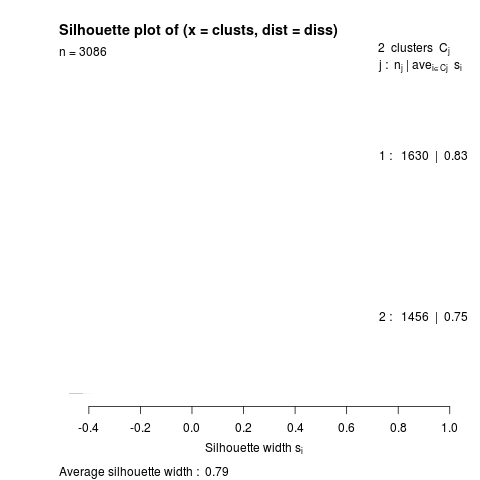

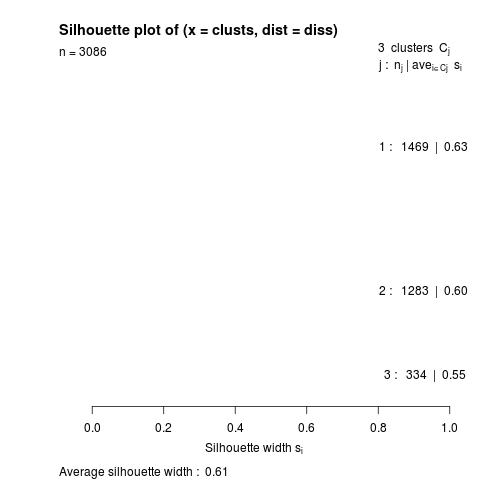

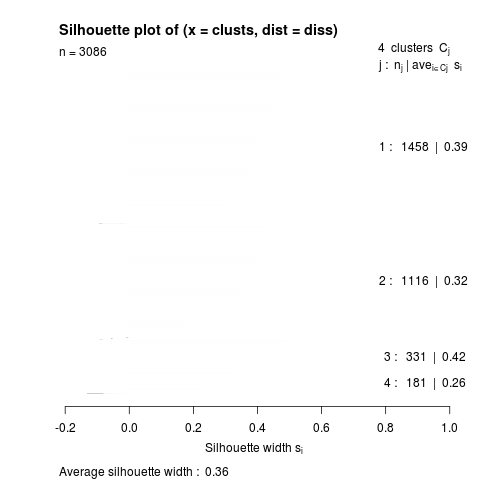

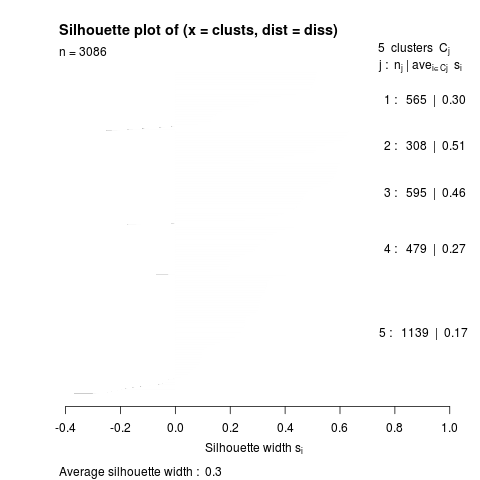

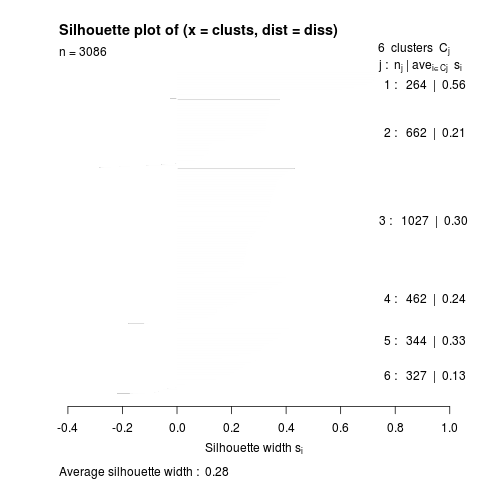

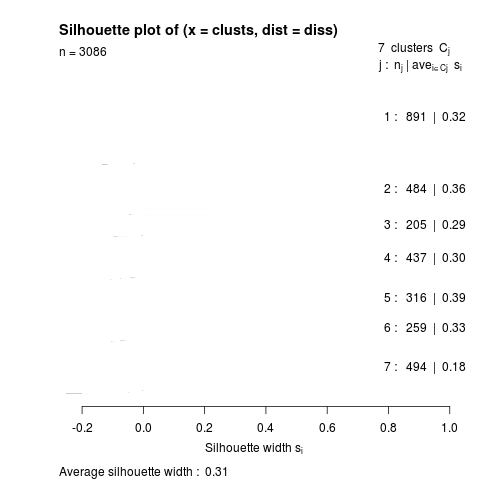

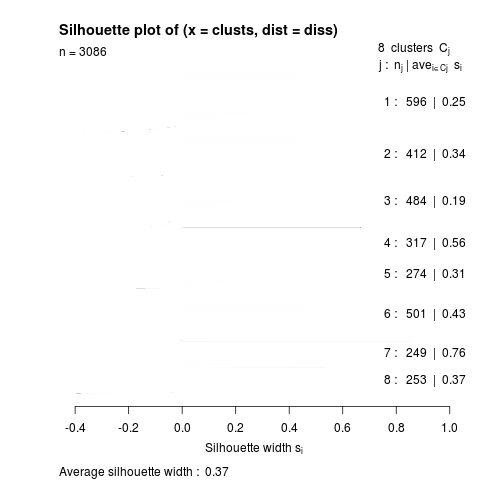

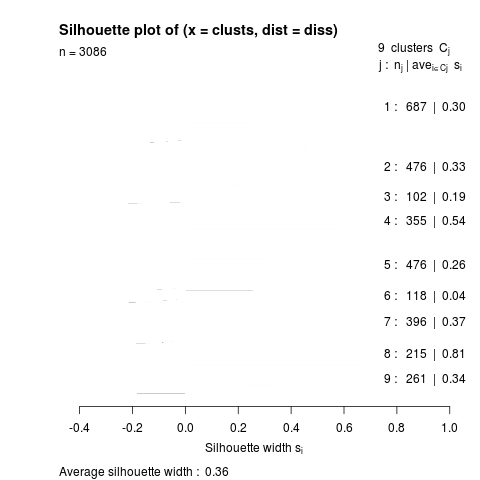

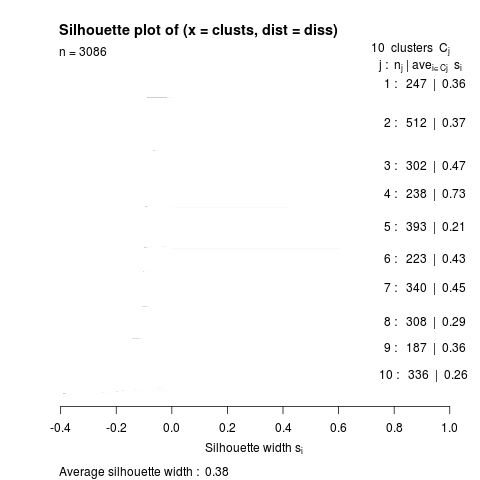

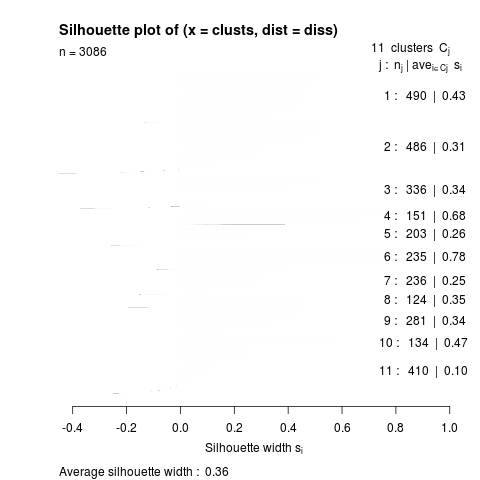

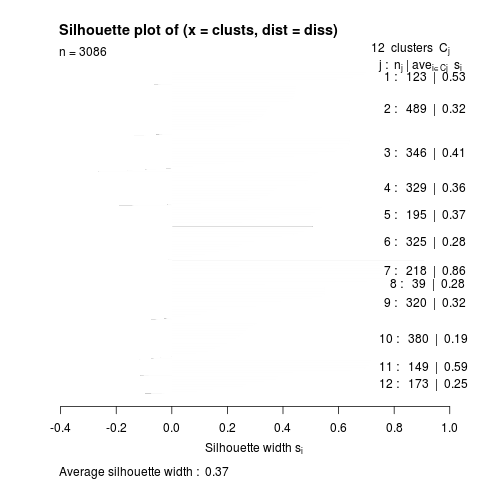

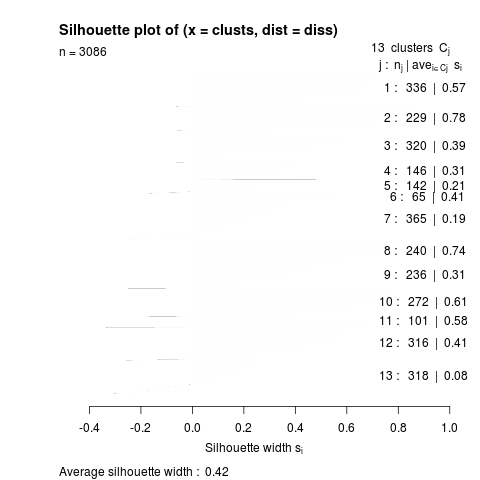

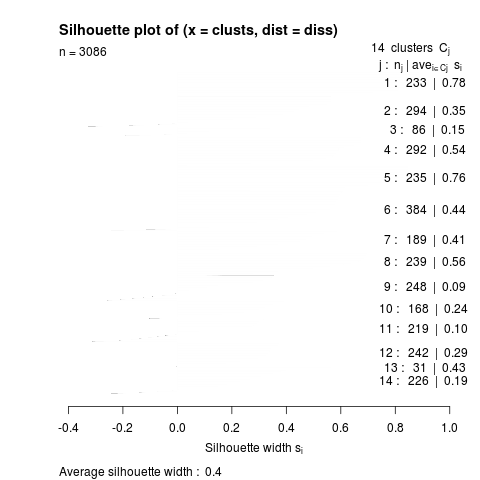

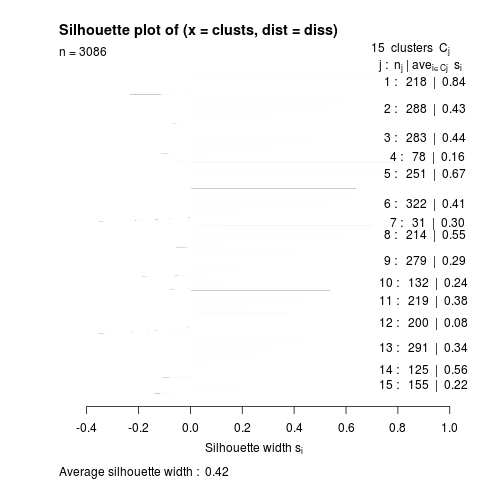

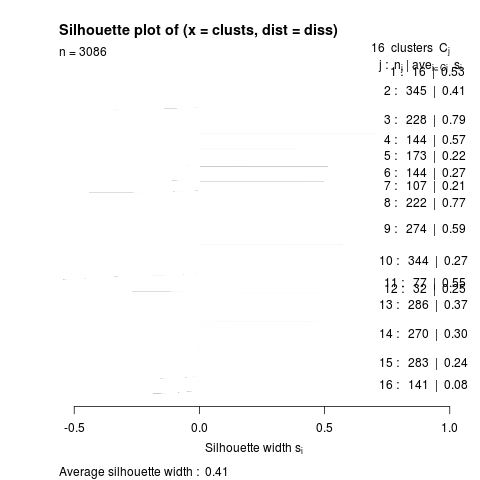

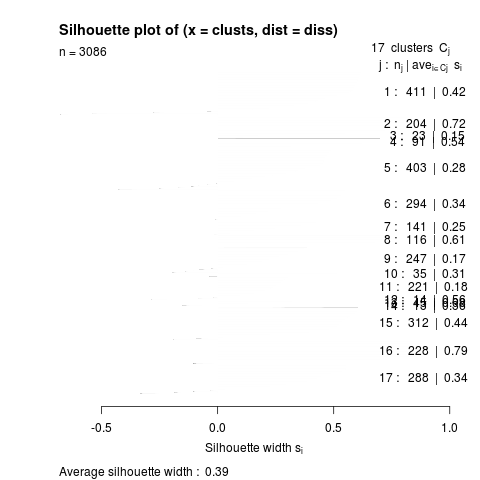

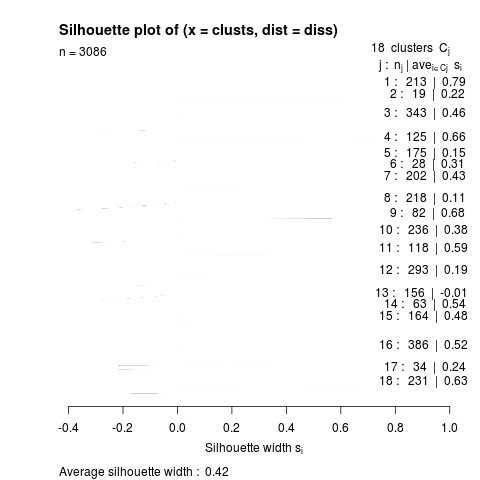

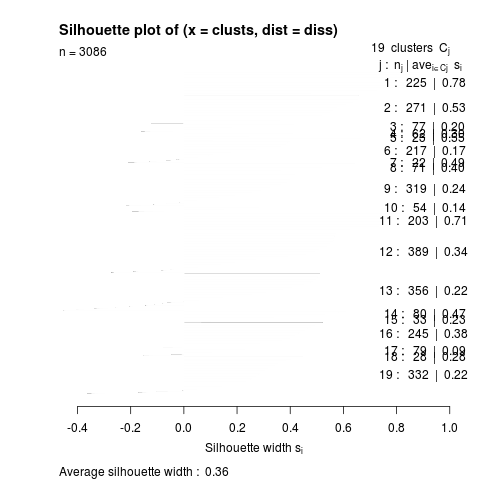

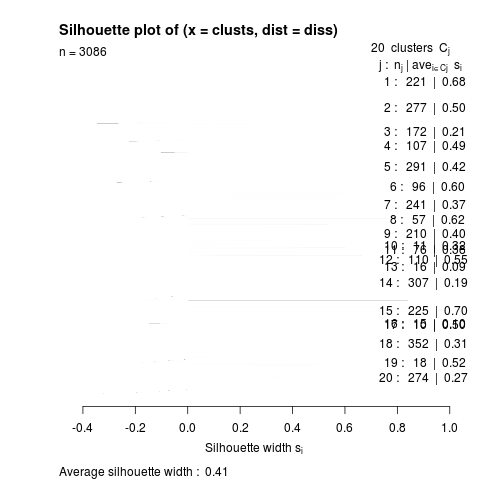

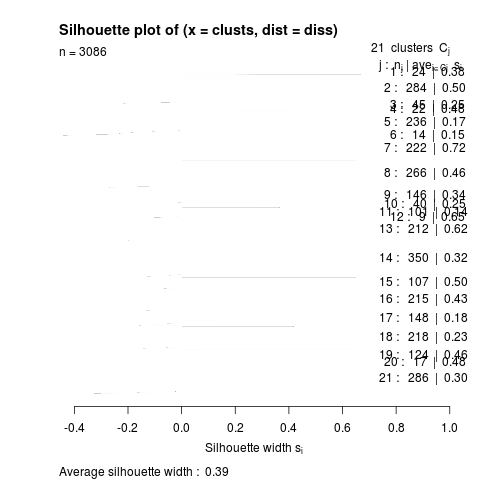

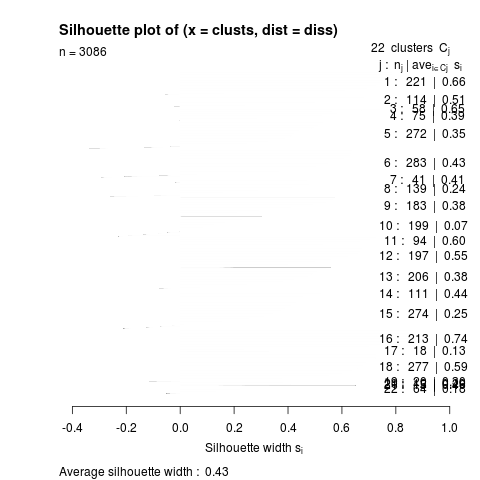

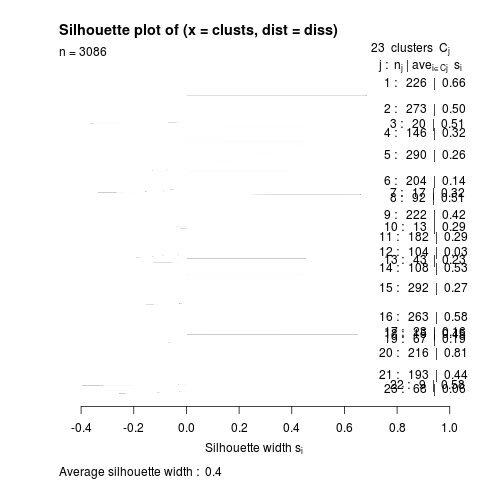

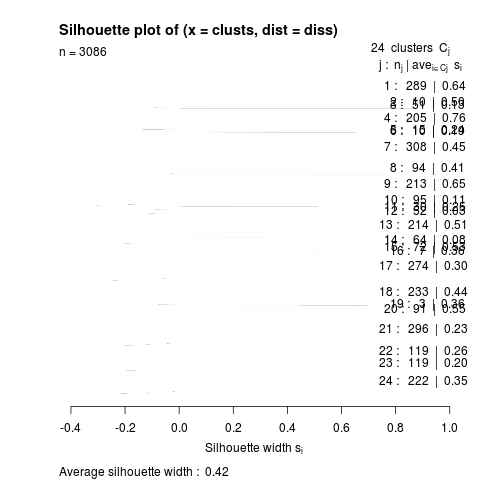

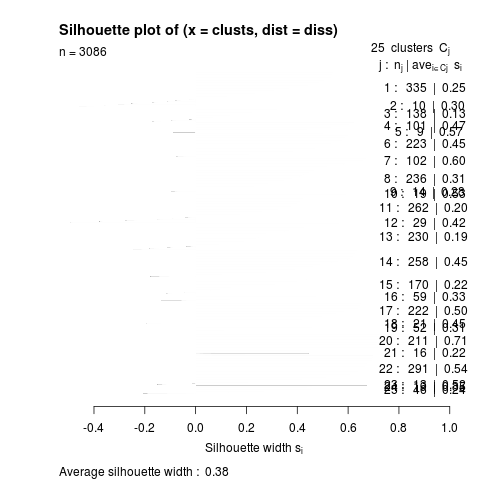

In [37]:
%%R

for (i in 2:25){
    sc3_plot_silhouette(P, k = i)
}

###LVM1

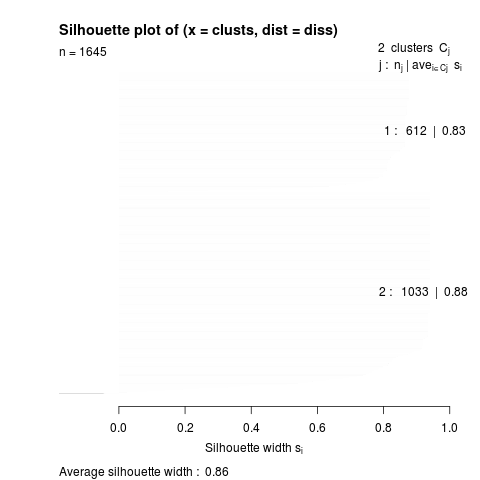

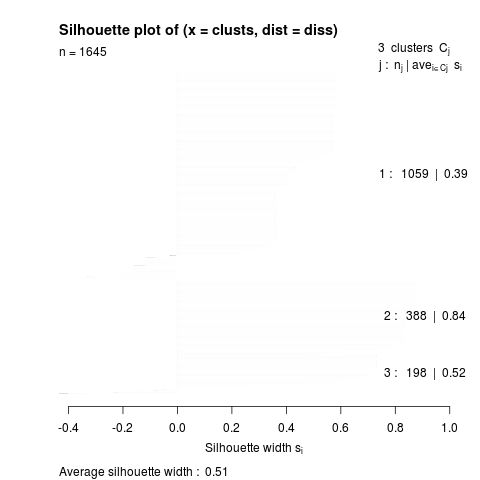

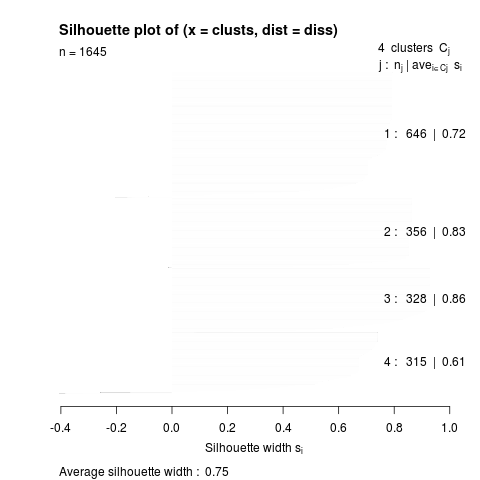

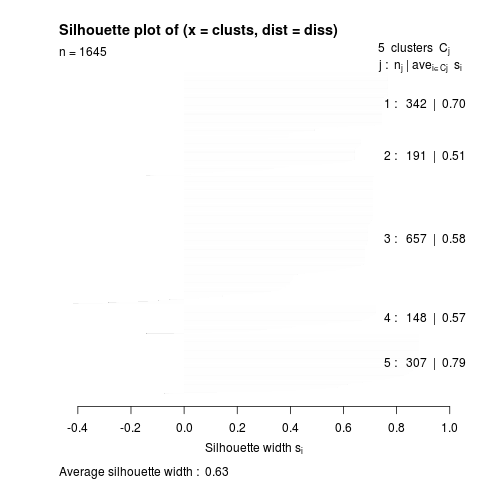

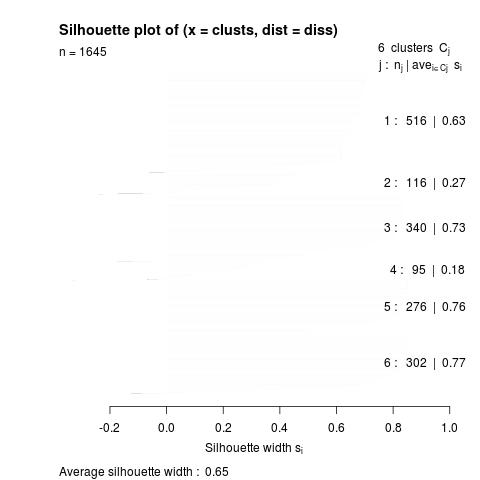

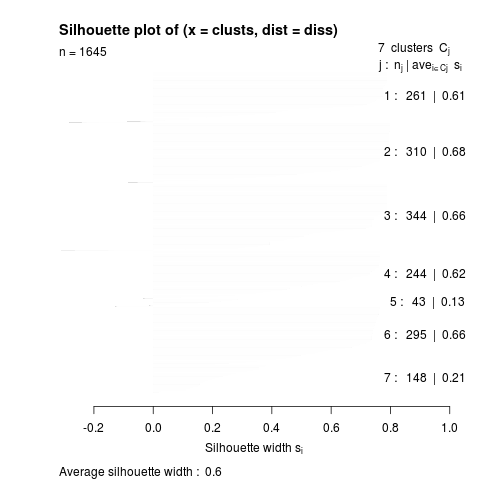

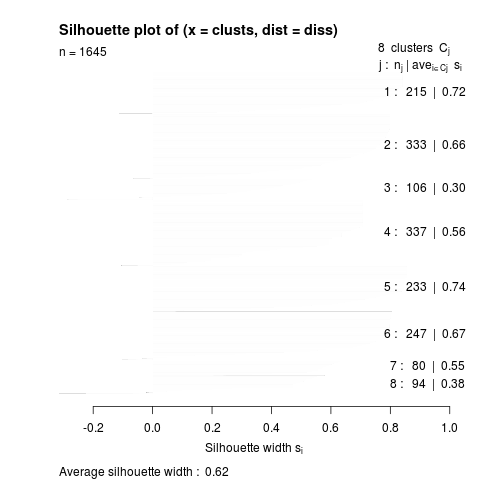

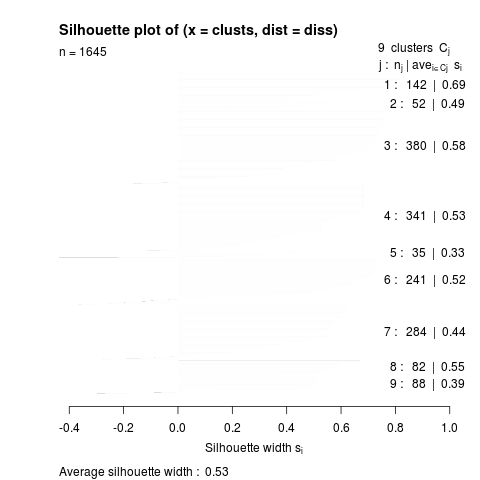

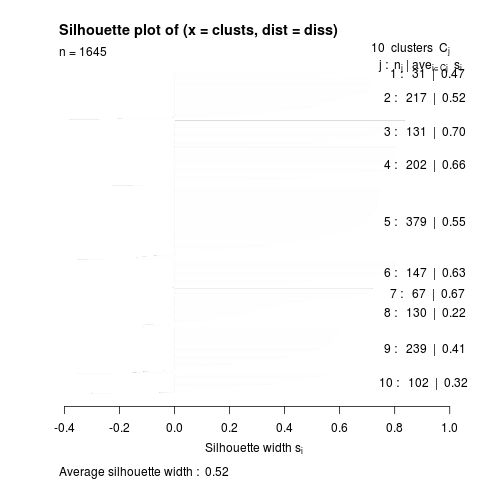

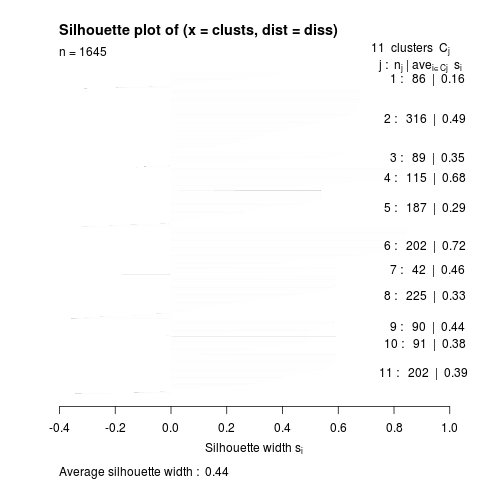

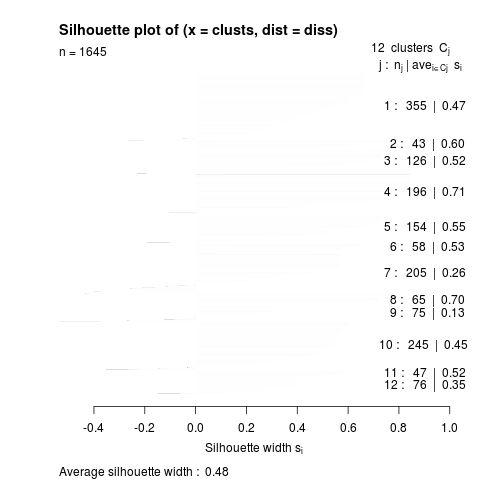

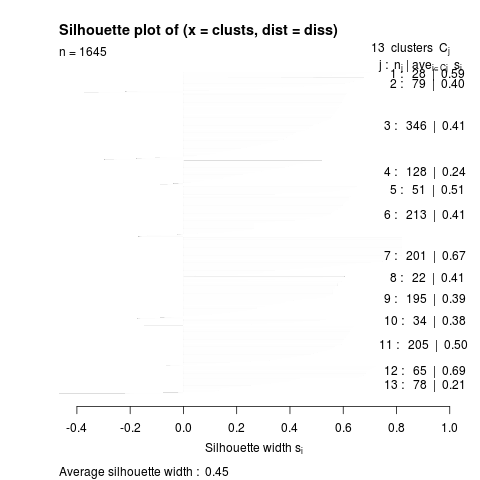

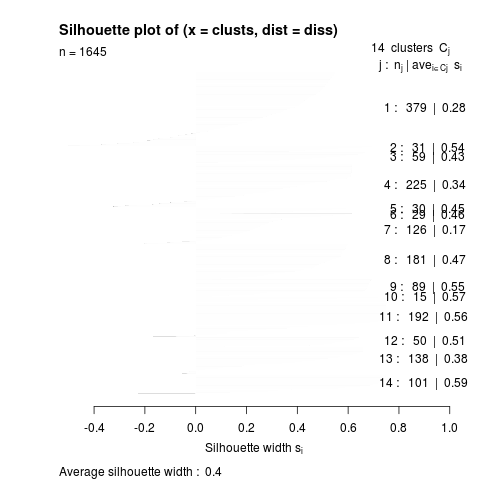

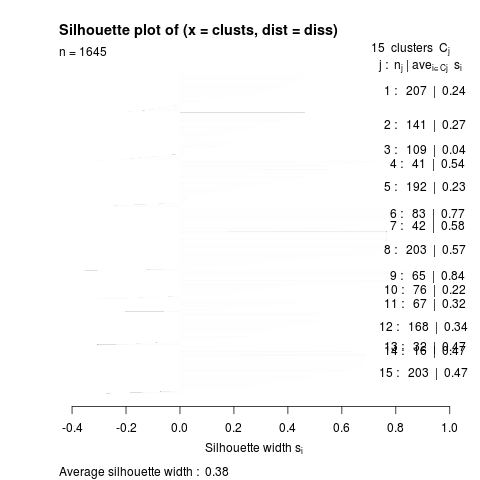

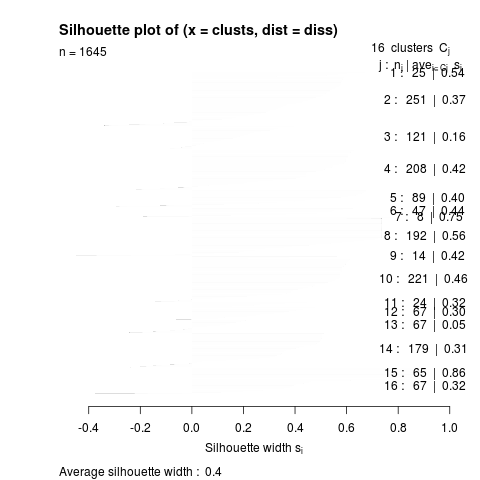

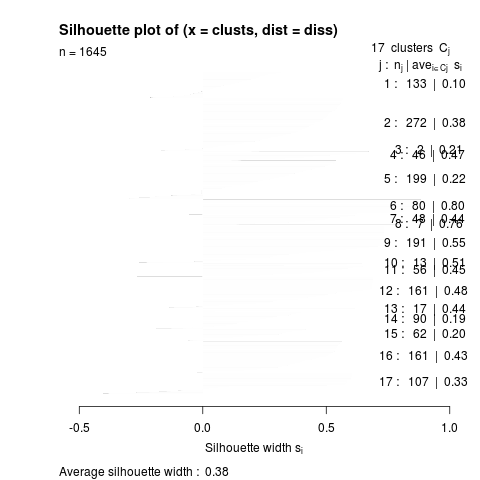

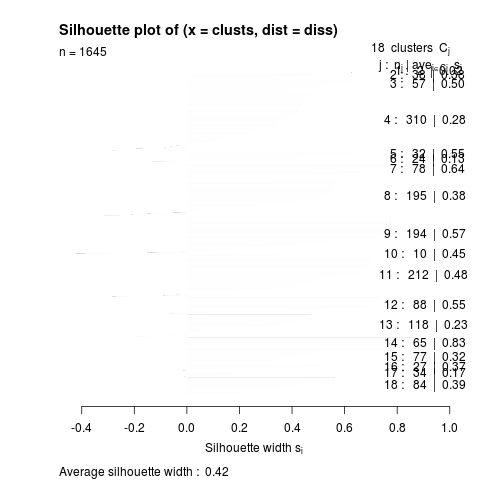

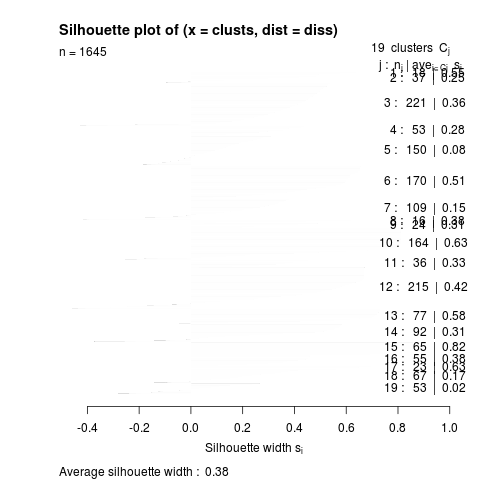

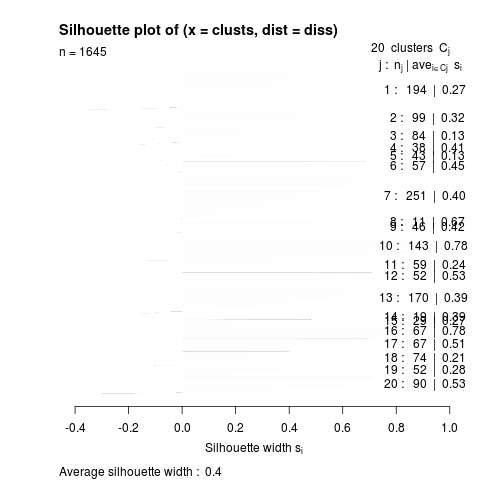

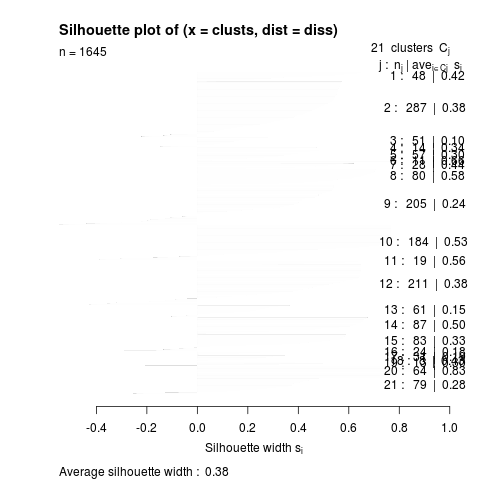

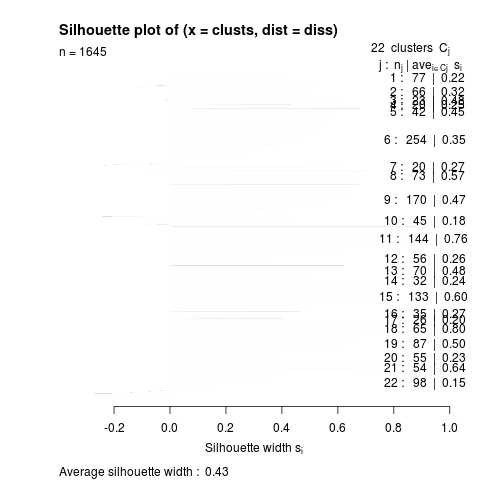

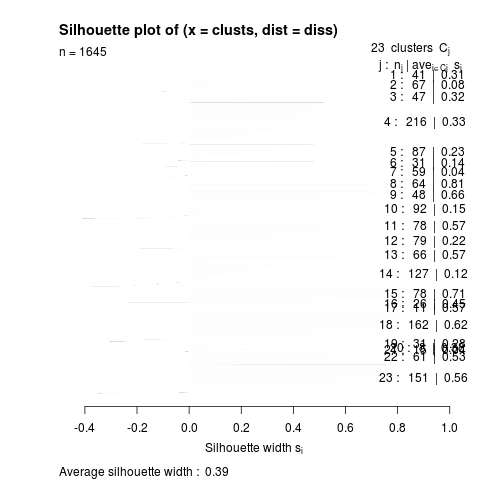

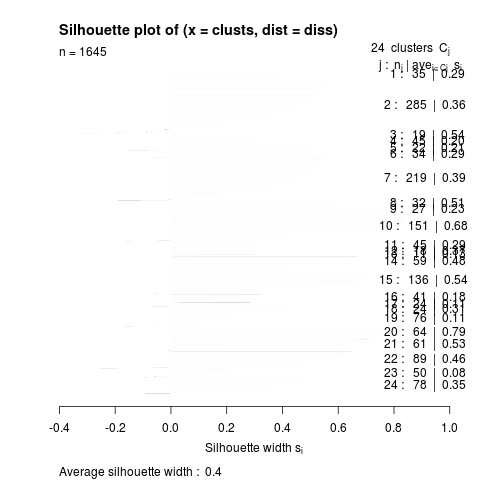

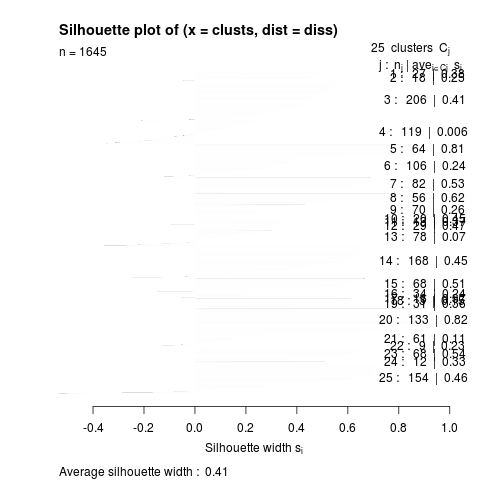

In [38]:
%%R

for (i in 2:25){
    sc3_plot_silhouette(LVM1, k = i)
}    

###LVM2

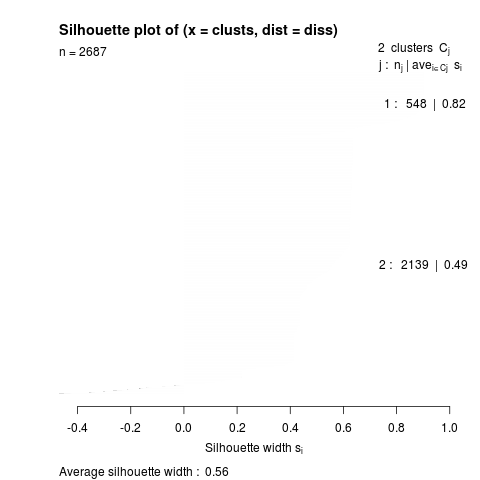

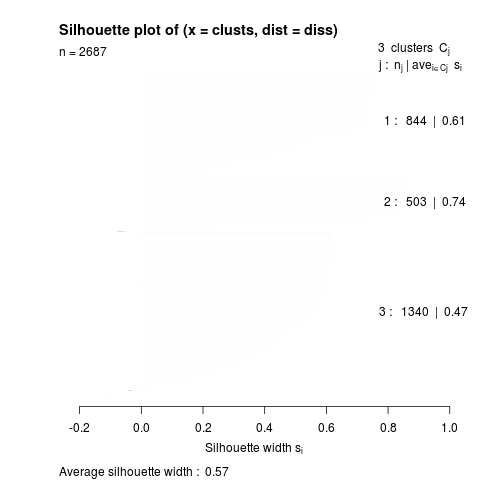

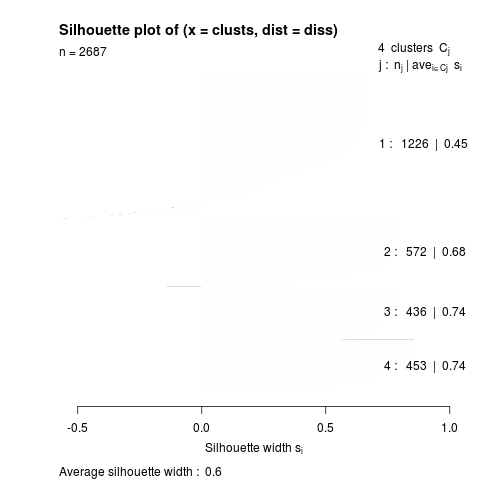

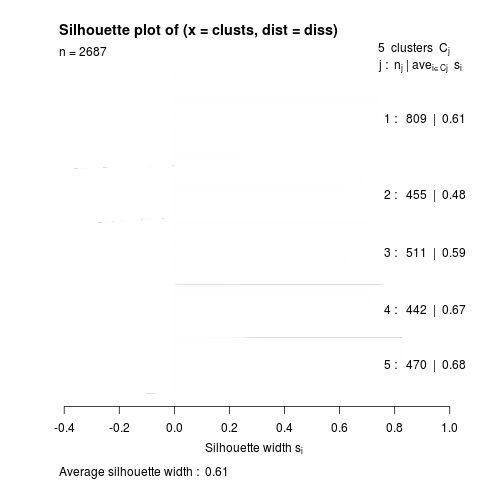

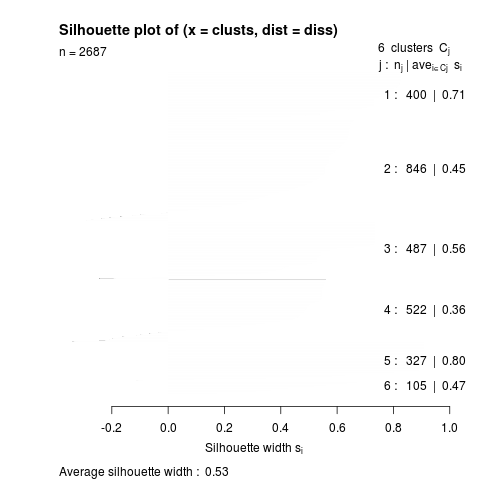

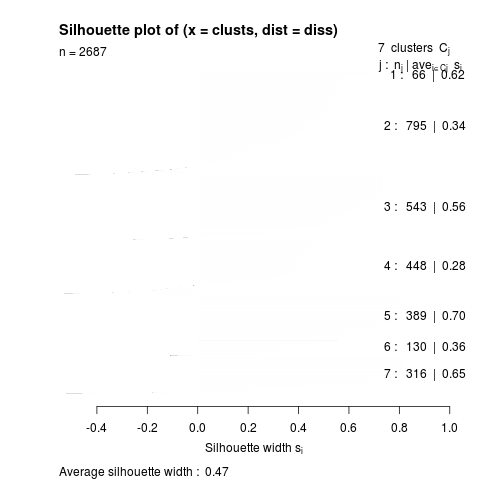

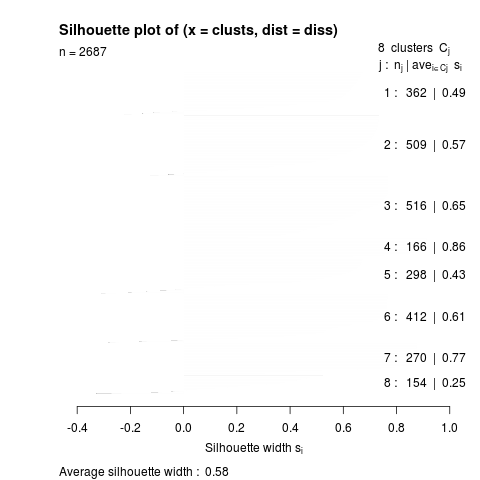

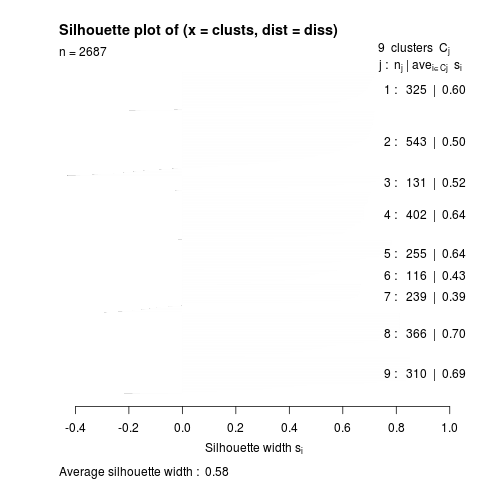

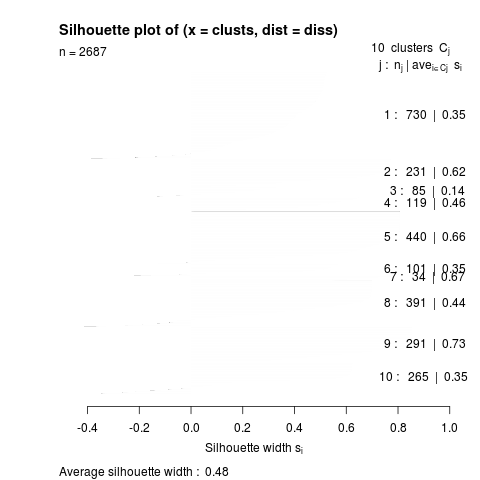

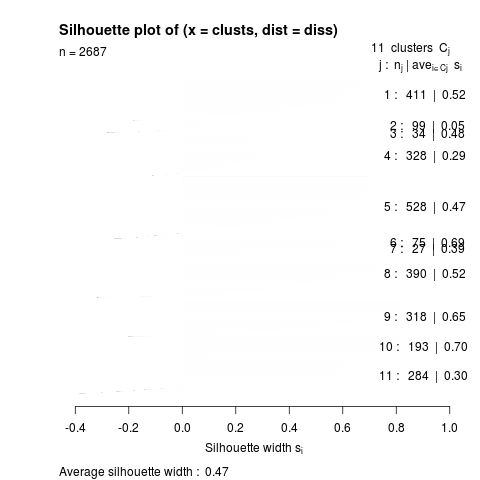

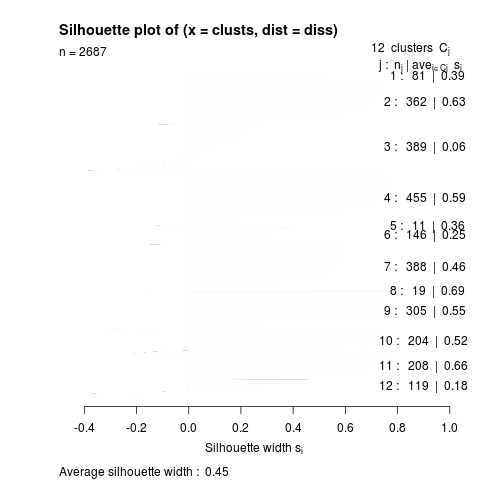

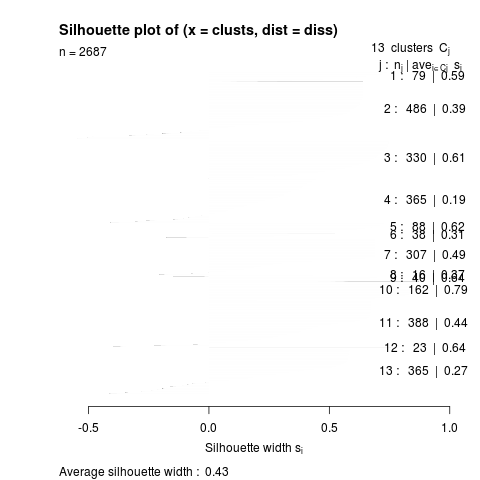

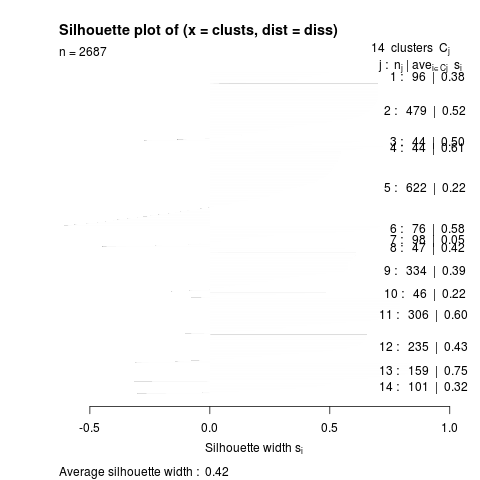

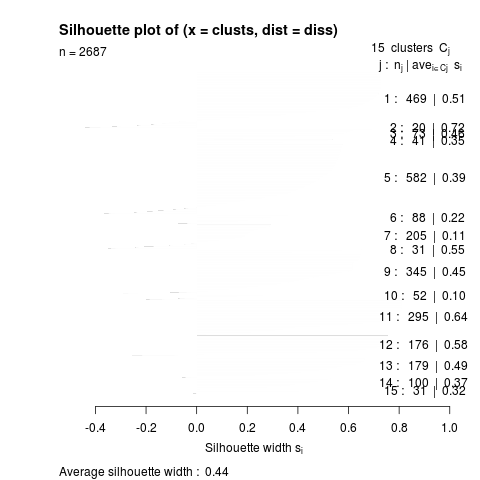

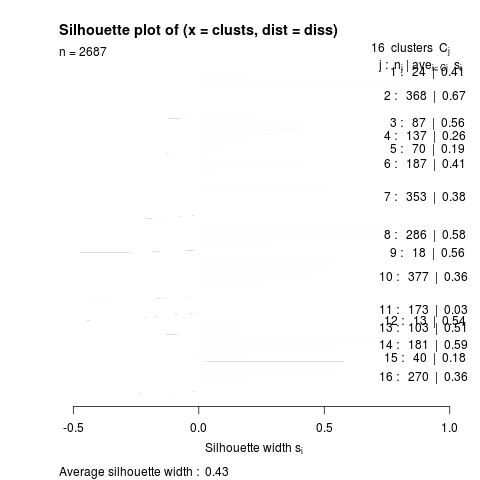

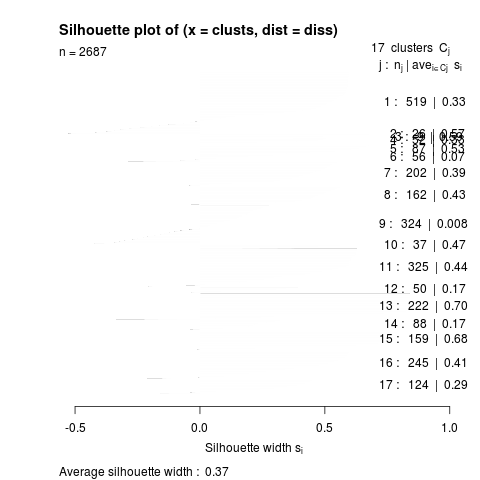

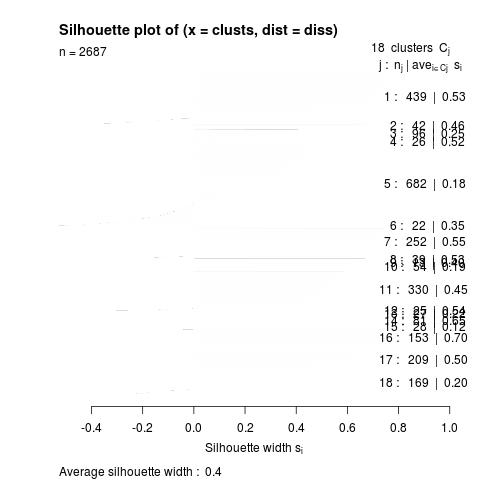

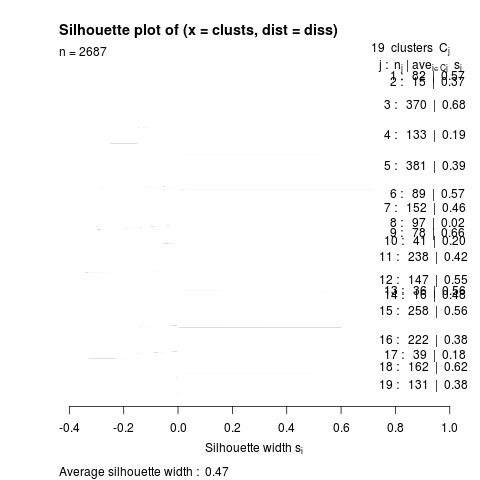

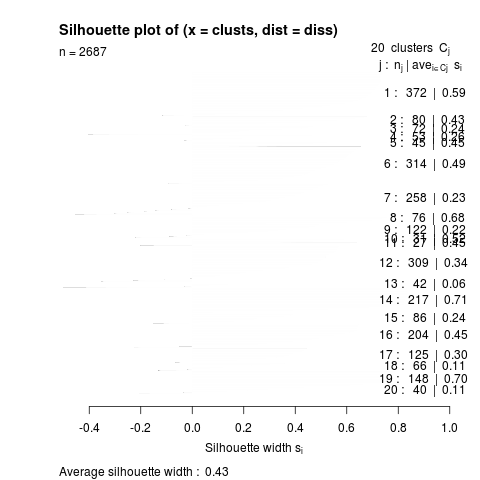

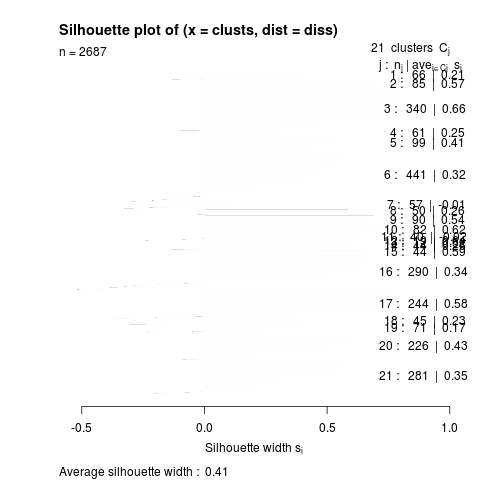

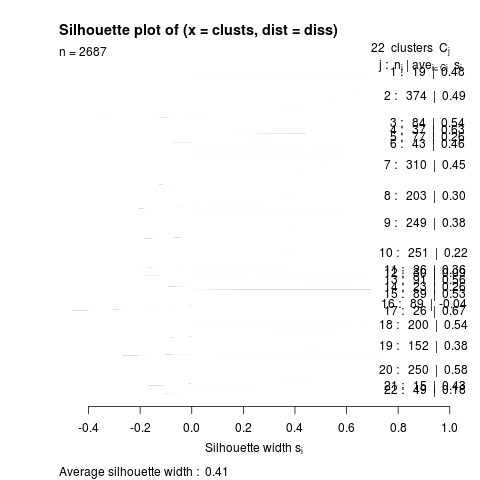

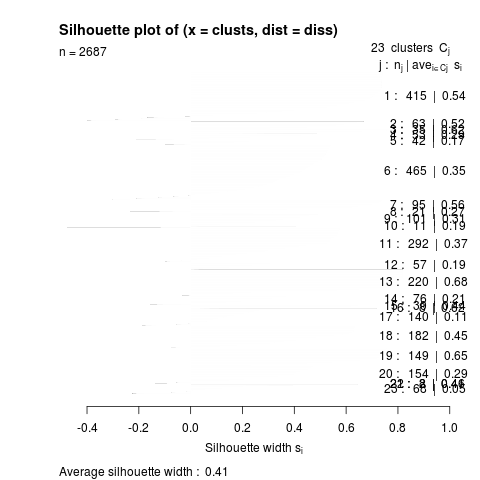

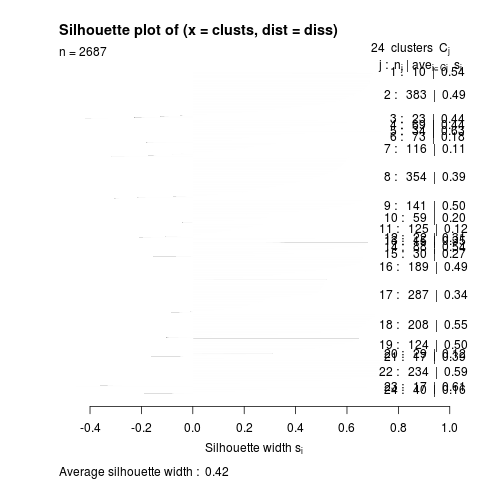

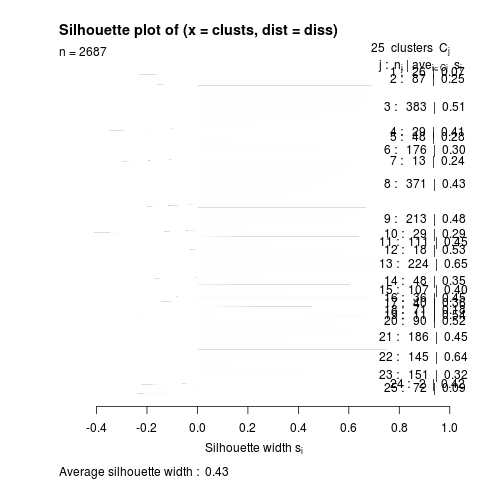

In [39]:
%%R

for (i in 2:25){
    sc3_plot_silhouette(LVM2, k = i)
}

Evaluate Perplexity
run TSNE separately; check perplexity values of 50, 40, 30, 15, 10, 5

In [50]:
%%R
###checking value of 50 
perplex = 50
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)

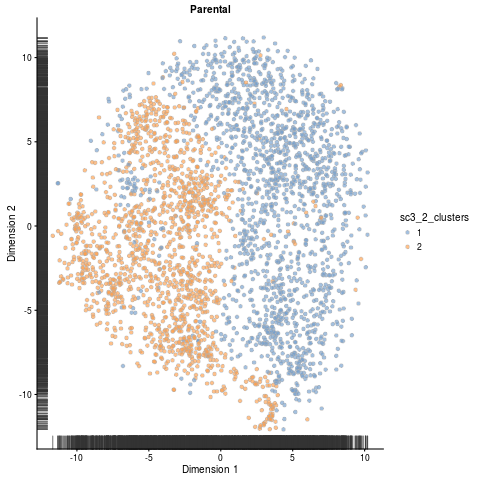

In [51]:
%%R
####plot
plotTSNE(
    P,
    colour_by = "sc3_2_clusters"
) + ggtitle("Parental") 

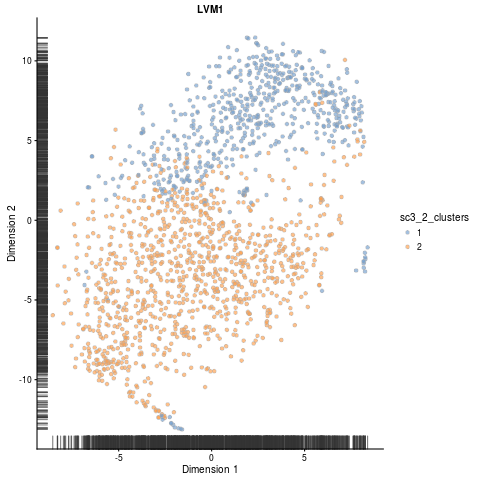

In [52]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_2_clusters"
) + ggtitle("LVM1") 

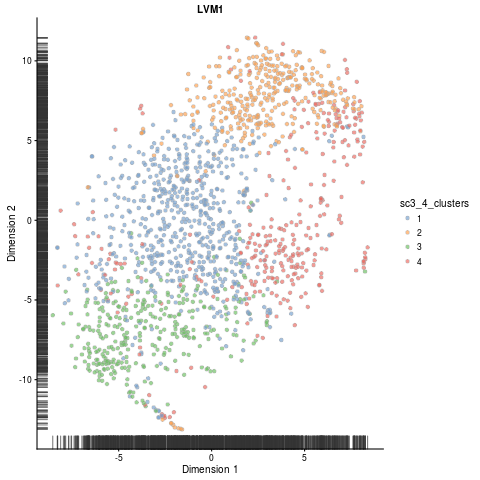

In [53]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_4_clusters"
) + ggtitle("LVM1") 

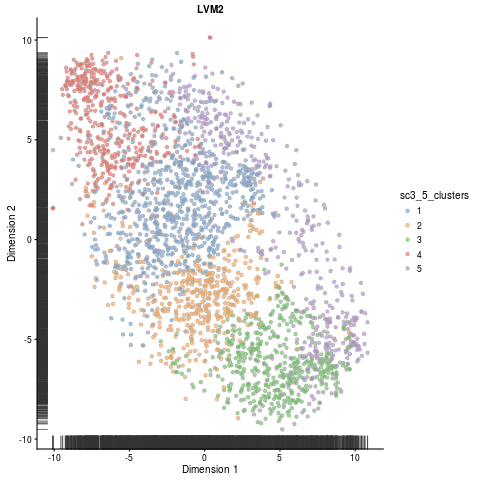

In [54]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_5_clusters"
) + ggtitle("LVM2") 

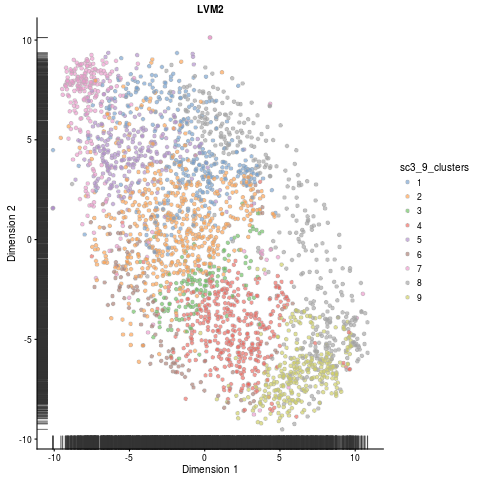

In [55]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_9_clusters"
) + ggtitle("LVM2") 

now checking 40

In [56]:
%%R
###checking value of 40
perplex = 40
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)

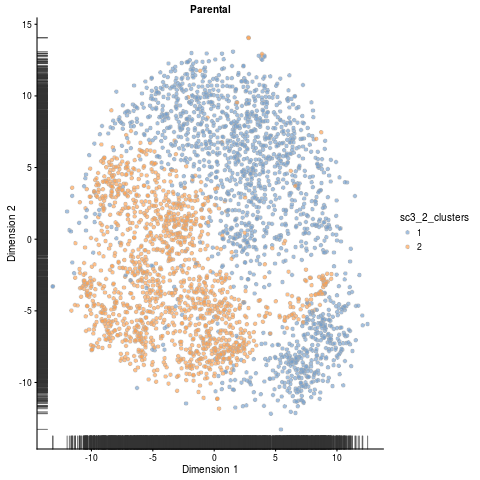

In [57]:
%%R
####plot
plotTSNE(
    P,
    colour_by = "sc3_2_clusters"
) + ggtitle("Parental") 

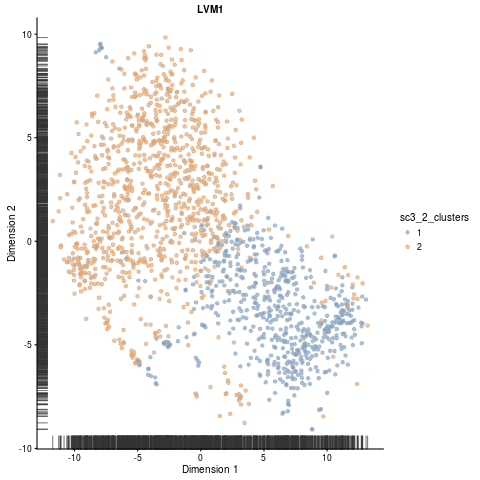

In [58]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_2_clusters"
) + ggtitle("LVM1") 

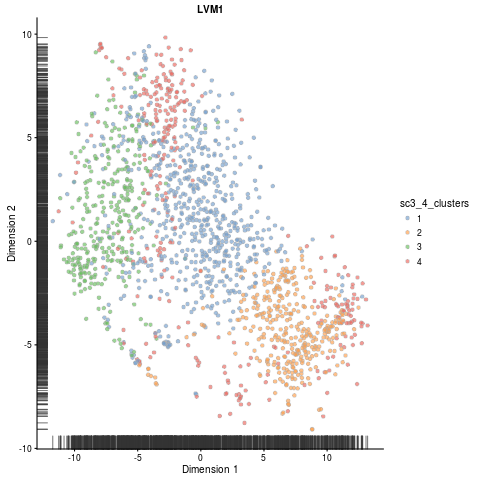

In [59]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_4_clusters"
) + ggtitle("LVM1") 

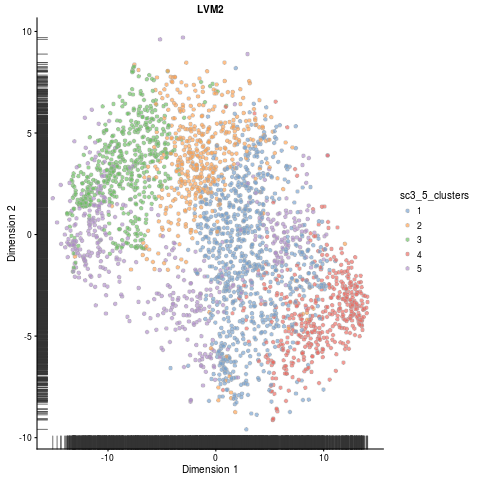

In [60]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_5_clusters"
) + ggtitle("LVM2") 

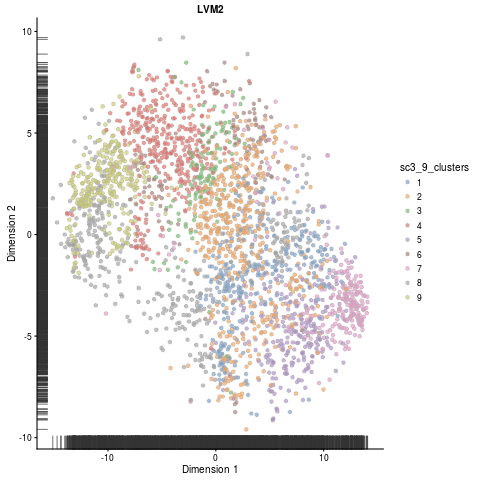

In [61]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_9_clusters"
) + ggtitle("LVM2") 

now checking 30

In [62]:
%%R
###checking value of 30
perplex = 30
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)

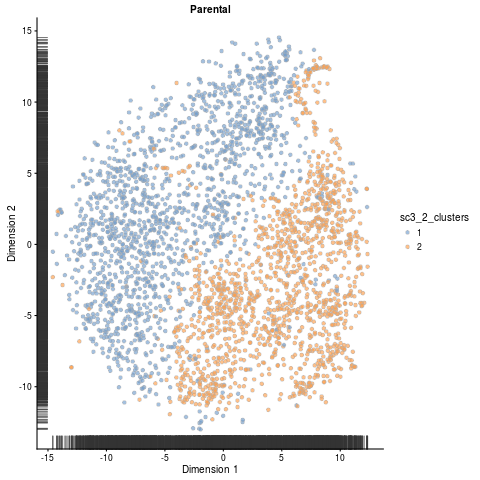

In [63]:
%%R
####plot
plotTSNE(
    P,
    colour_by = "sc3_2_clusters"
) + ggtitle("Parental") 

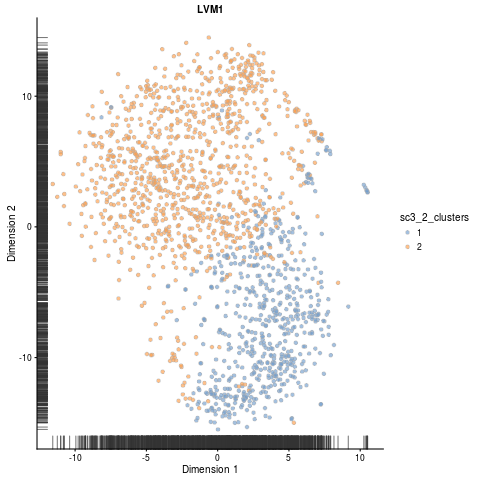

In [64]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_2_clusters"
) + ggtitle("LVM1") 

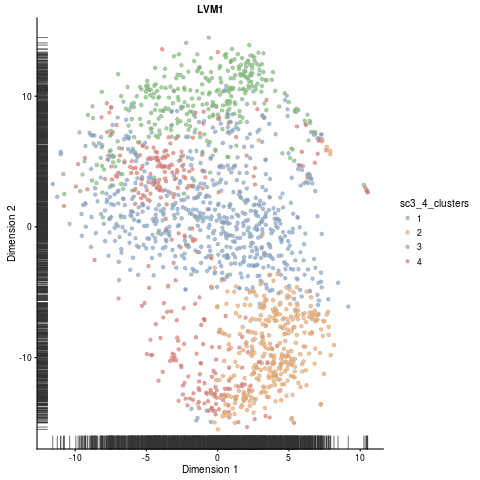

In [65]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_4_clusters"
) + ggtitle("LVM1") 

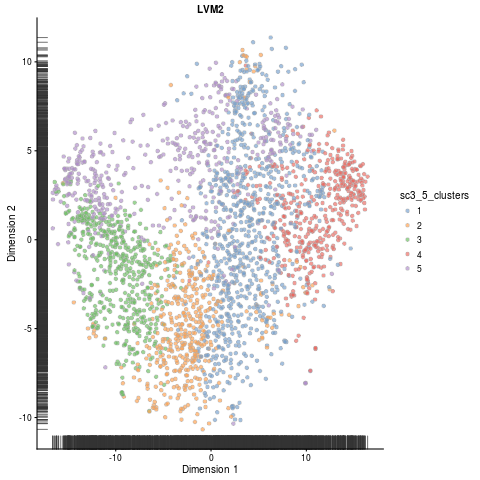

In [66]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_5_clusters"
) + ggtitle("LVM2") 

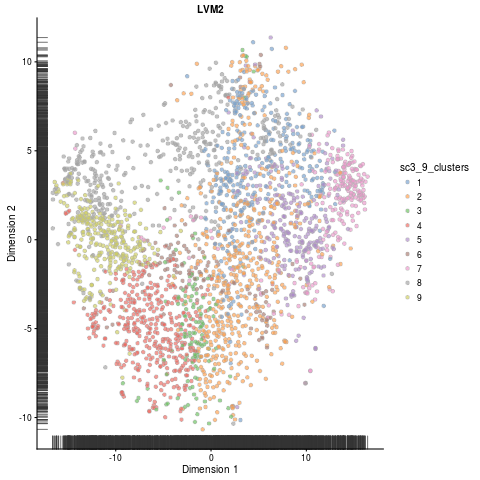

In [67]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_9_clusters"
) + ggtitle("LVM2") 

now checking 15

In [68]:
%%R
###checking value of 15
perplex = 15
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)

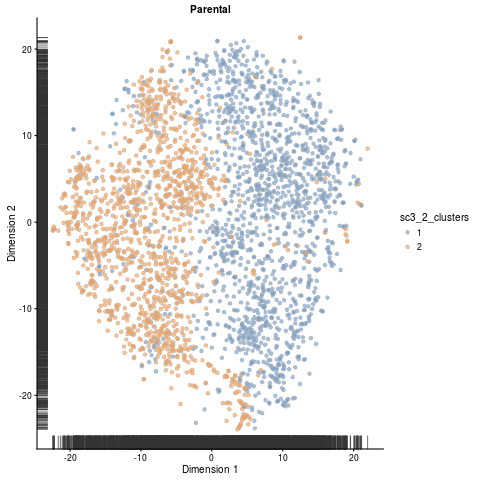

In [69]:
%%R
####plot
plotTSNE(
    P,
    colour_by = "sc3_2_clusters"
) + ggtitle("Parental") 

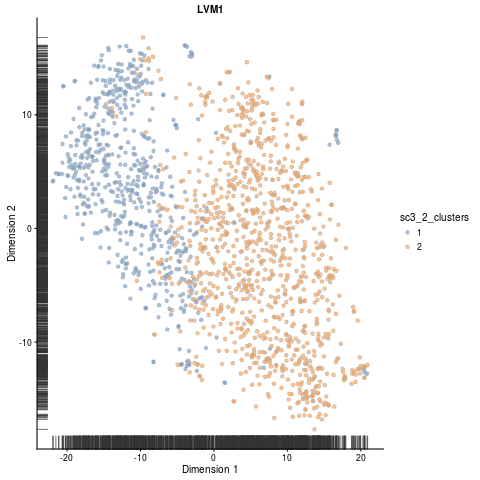

In [70]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_2_clusters"
) + ggtitle("LVM1") 

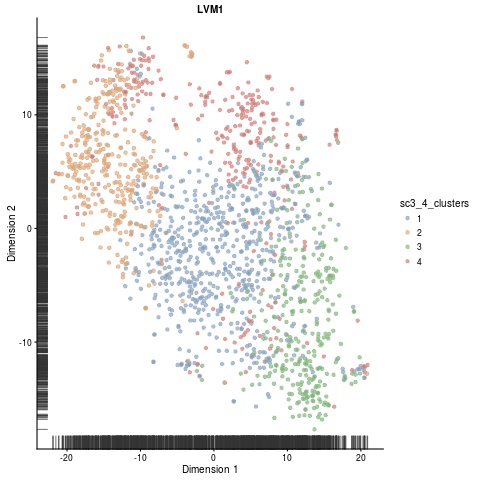

In [71]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_4_clusters"
) + ggtitle("LVM1") 

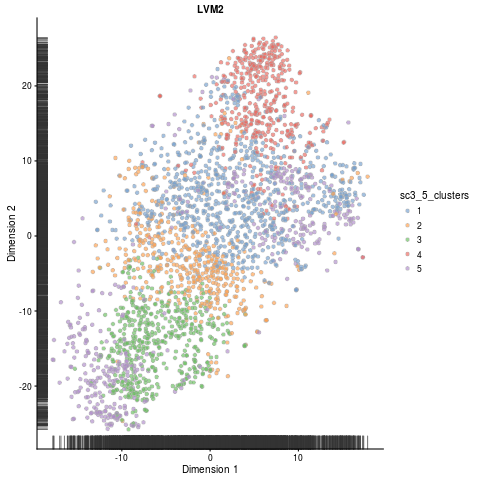

In [72]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_5_clusters"
) + ggtitle("LVM2") 

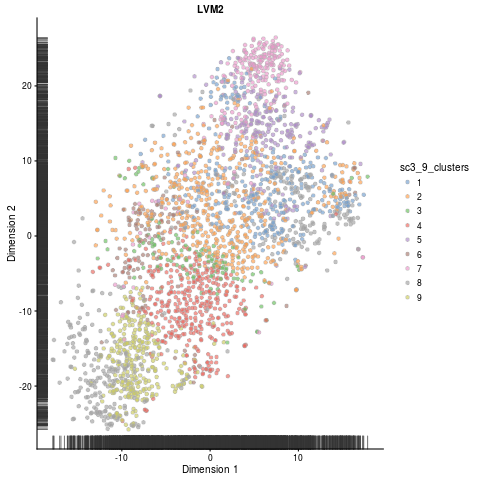

In [73]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_9_clusters"
) + ggtitle("LVM2") 

now checking 5

In [74]:
%%R
###checking value of 5
perplex = 5
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)

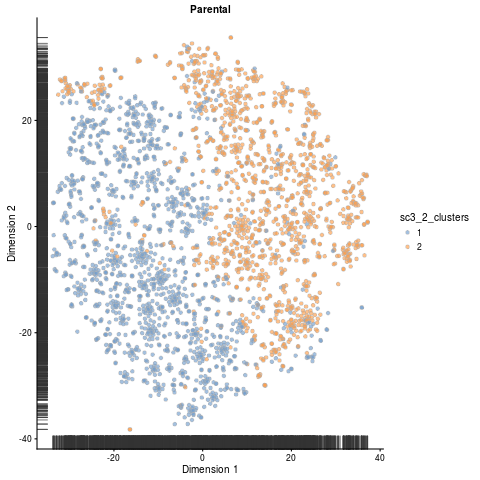

In [75]:
%%R
####plot
plotTSNE(
    P,
    colour_by = "sc3_2_clusters"
) + ggtitle("Parental") 

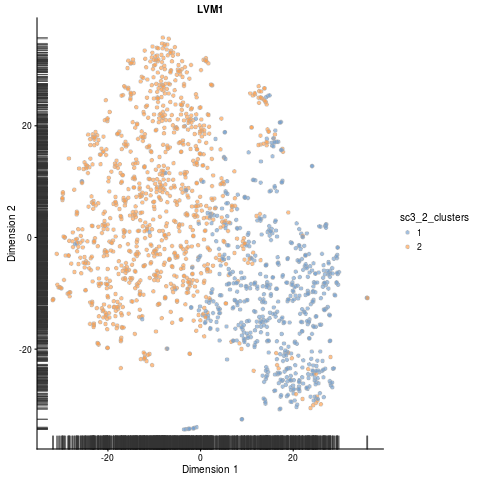

In [76]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_2_clusters"
) + ggtitle("LVM1") 

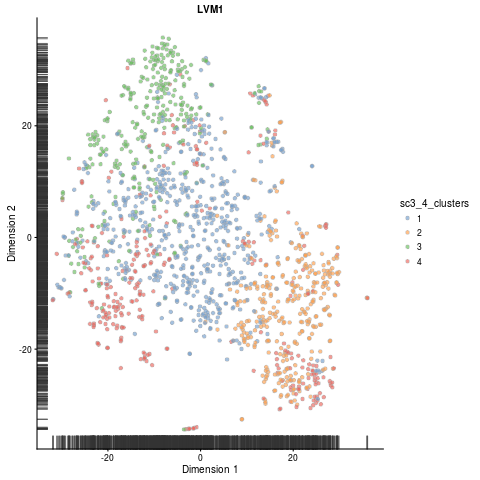

In [77]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_4_clusters"
) + ggtitle("LVM1") 

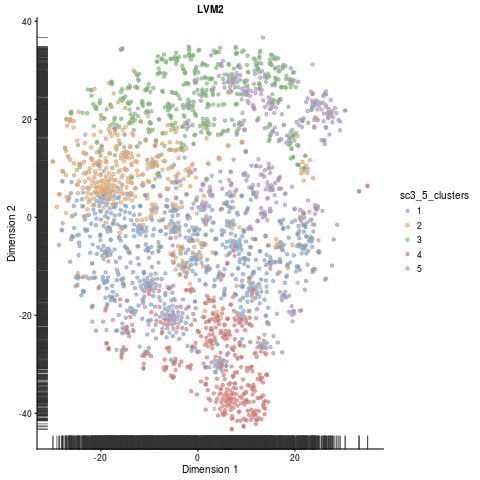

In [78]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_5_clusters"
) + ggtitle("LVM2") 

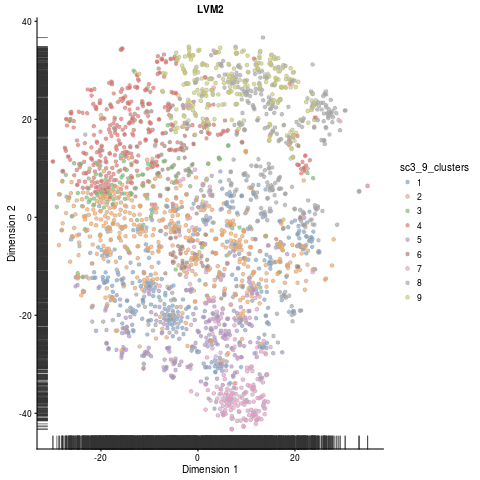

In [79]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_9_clusters"
) + ggtitle("LVM2") 

now checking 10

In [80]:
%%R
###checking value of 10
perplex = 10
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)

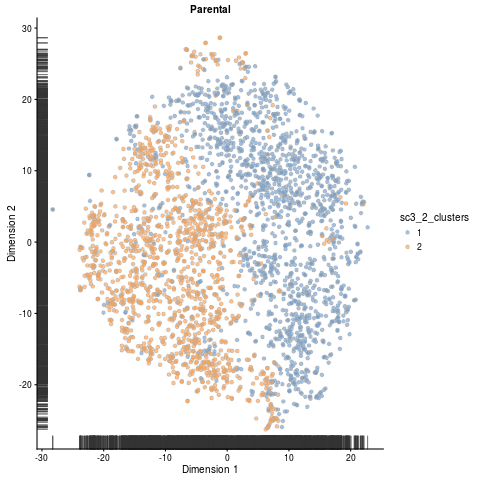

In [81]:
%%R
####plot
plotTSNE(
    P,
    colour_by = "sc3_2_clusters"
) + ggtitle("Parental") 

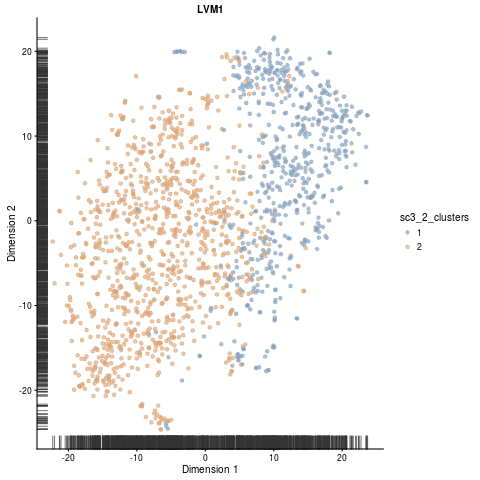

In [82]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_2_clusters"
) + ggtitle("LVM1") 

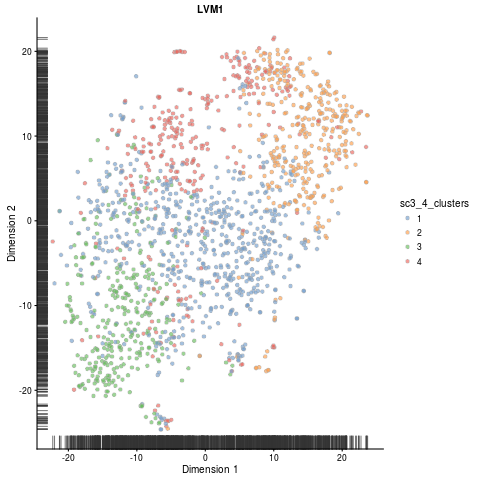

In [83]:
%%R
####plot
plotTSNE(
    LVM1,
    colour_by = "sc3_4_clusters"
) + ggtitle("LVM1") 

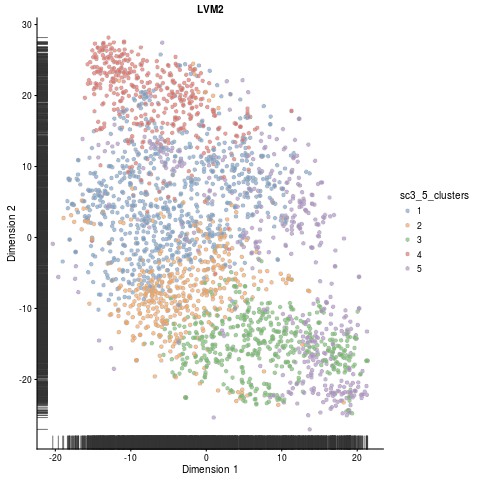

In [84]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_5_clusters"
) + ggtitle("LVM2") 

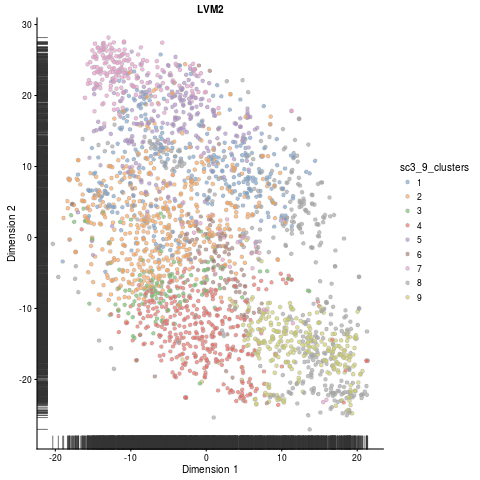

In [85]:
%%R
####plot
plotTSNE(
    LVM2,
    colour_by = "sc3_9_clusters"
) + ggtitle("LVM2") 

# perplexity = 50 looks best

In [92]:
%%R
###checking value of 50
perplex = 50
P <- runTSNE(P,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)
LVM1 <- runTSNE(LVM1,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)
LVM2 <- runTSNE(LVM2,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)

In [93]:
%%R

###save file
saveRDS(P, file = "scater/separately_clustered/sc3_clustered_P.rds")
###save file
saveRDS(LVM1, file = "scater/separately_clustered/sc3_clustered_LVM1.rds")
###save file
saveRDS(LVM2, file = "scater/separately_clustered/sc3_clustered_LVM2.rds")

# ###look at clustering heirarchy trees

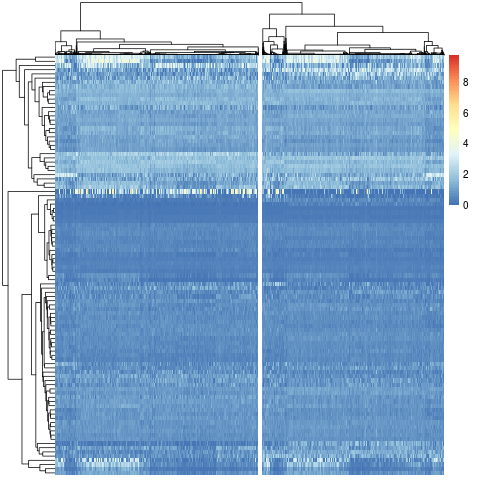

In [88]:
%%R
for (i in 2:2){
    sc3_plot_expression(P, k = i)
}

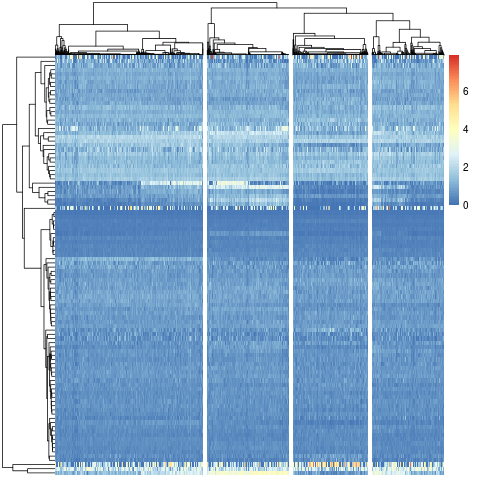

In [89]:
%%R
for (i in 4:4){
    sc3_plot_expression(LVM1, k = i)
}

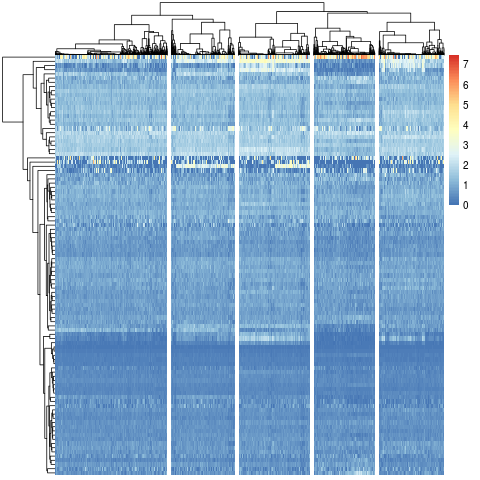

In [90]:
%%R
for (i in 5:5){
    sc3_plot_expression(LVM2, k = i)
}

# Overcluster Parental Population

In [3]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
###readin
scdata <- readRDS("scater/ready_for_clustering.rds")
#####subset in preparation for separate clustering
P <- scdata[ , colData(scdata)$sample == "Parent"]

##############
########cluster P
##############
scdata <- P
#####
rowData(scdata)$feature_symbol <-rownames(scdata)
####cluster
scdata <- sc3(scdata, ks = 25:100, biology = TRUE,n_cores=16)
####estimate optimal cluster size
scdata <- sc3_estimate_k(scdata)
print(metadata(scdata)$sc3$k_estimation)
###save file
saveRDS(scdata, file = "scater/separately_clustered/sc3_clustered_P_overclustered.rds")


/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: SummarizedExperiment

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: GenomicRanges

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching pack


[1] 21


# Visualize datasets clustered separately (P_over)

In [4]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
library(gridExtra)
library(grid)
###readin
P <- readRDS("scater/separately_clustered/sc3_clustered_P_overclustered.rds")


/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘gridExtra’


  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following object is masked from ‘package:Biobase’:

    combine


  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following object is masked from ‘package:BiocGenerics’:

    combine


  warnings.warn(x, RRuntimeWarning)


plot silhouettes to see best cluster number

###Parental

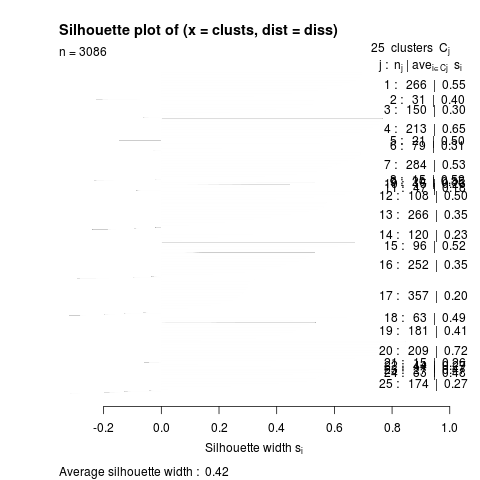

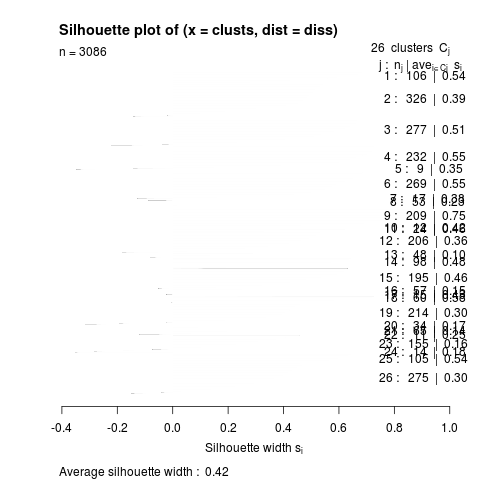

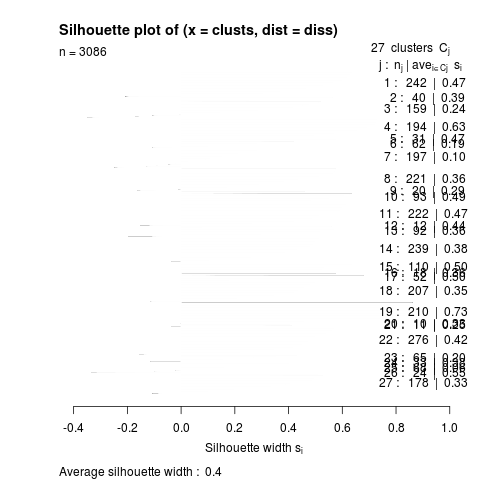

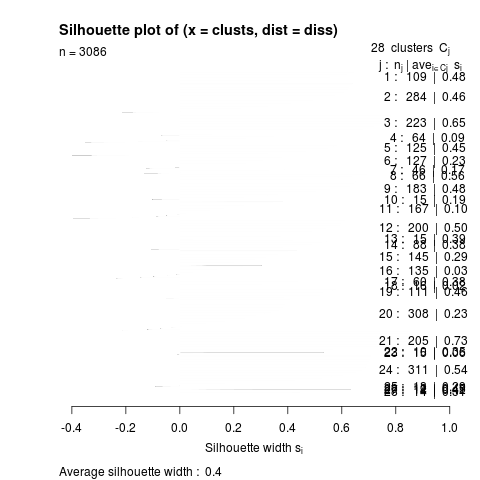

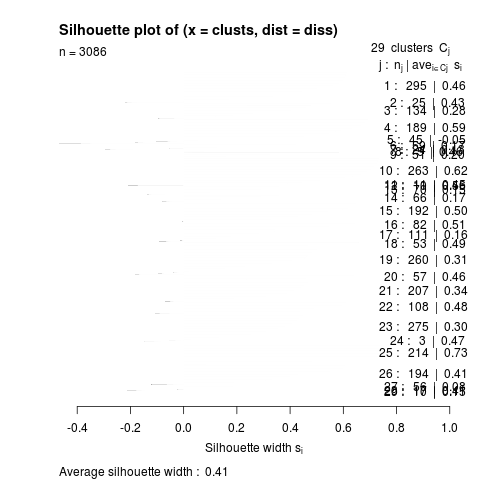

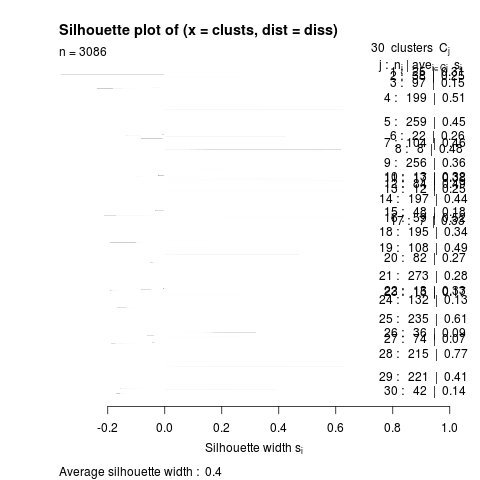

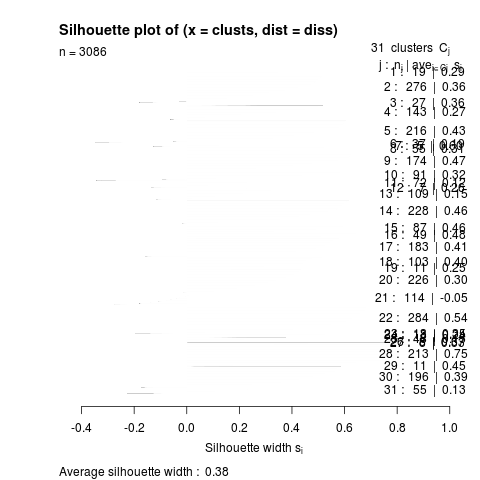

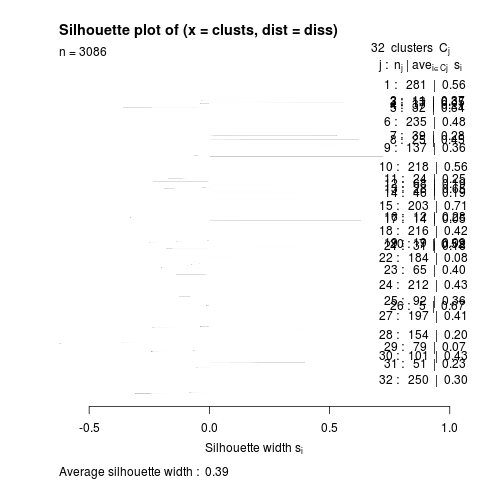

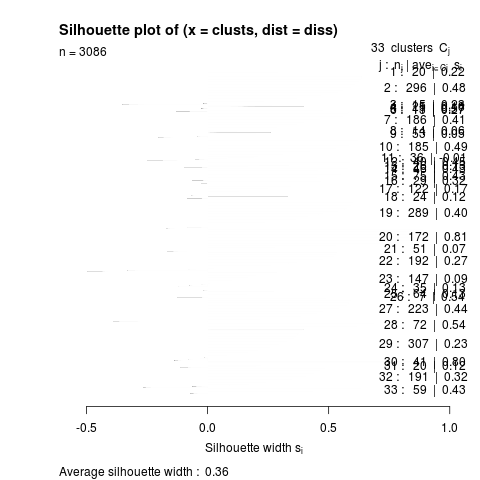

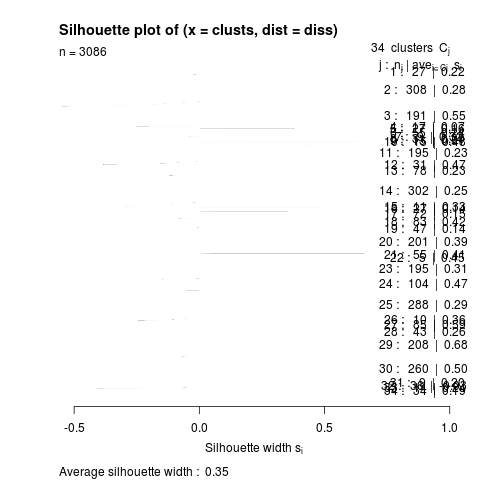

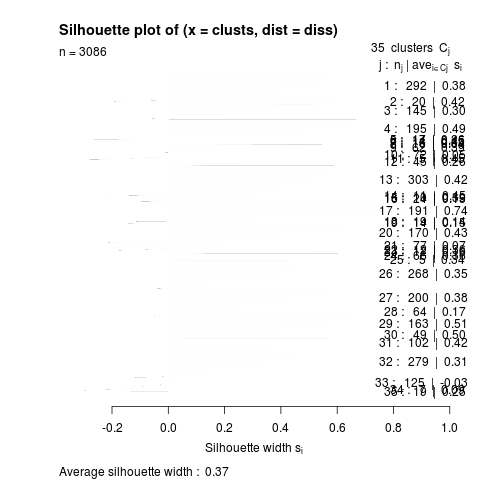

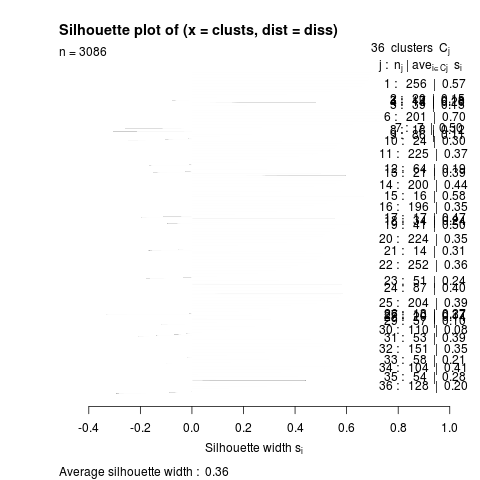

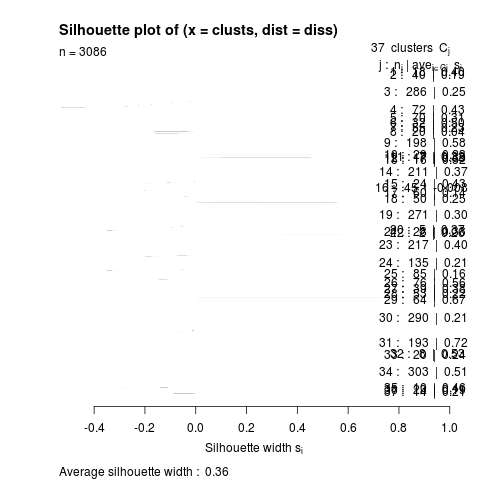

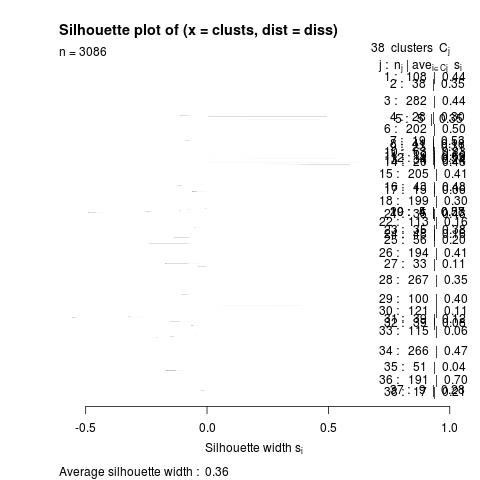

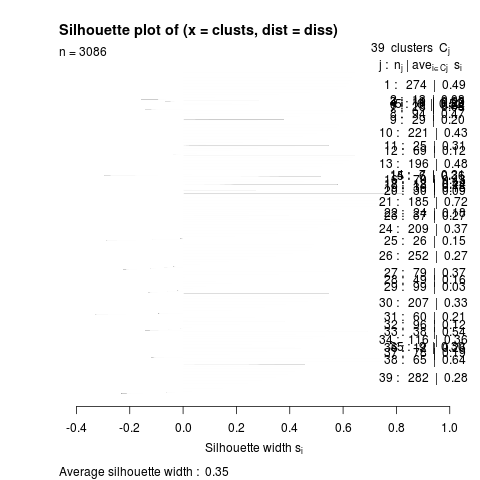

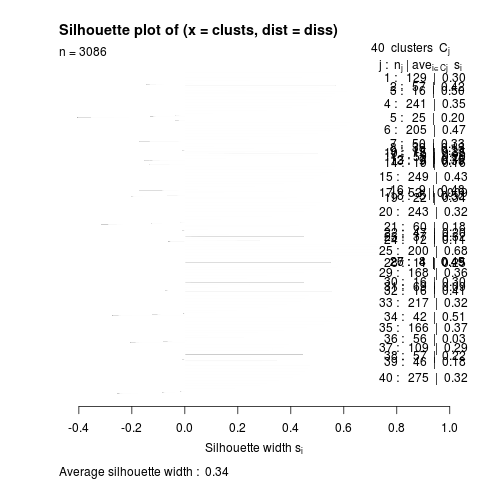

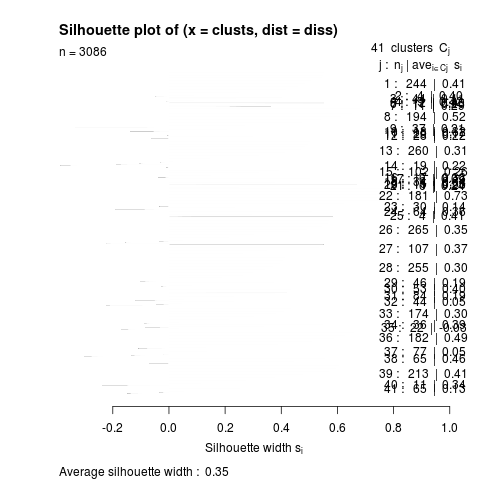

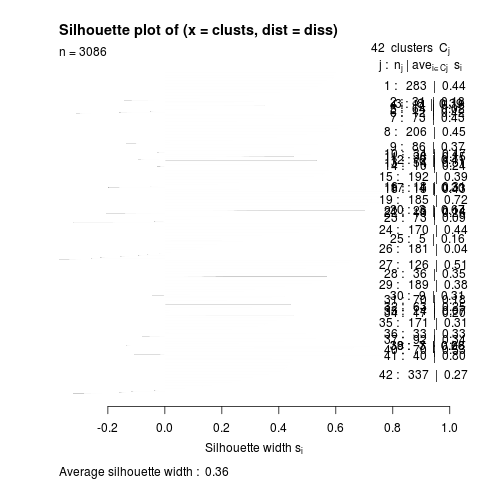

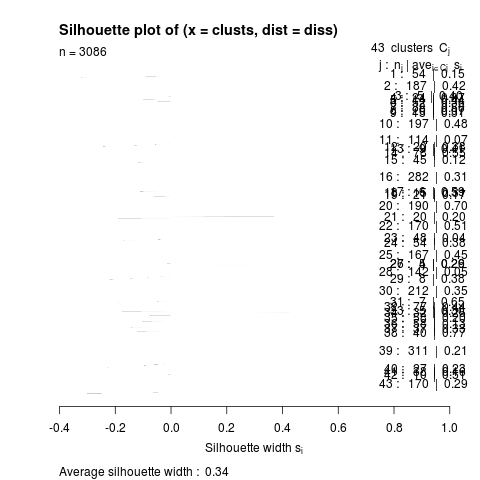

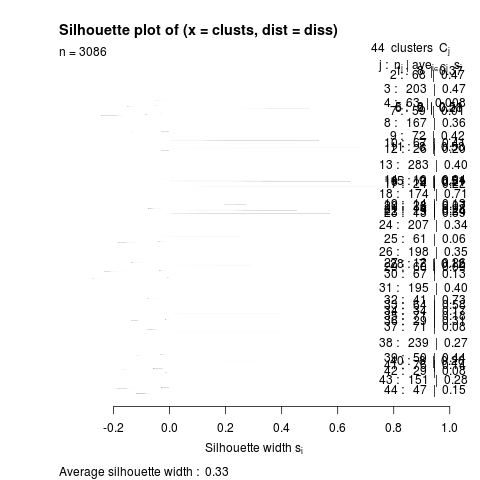

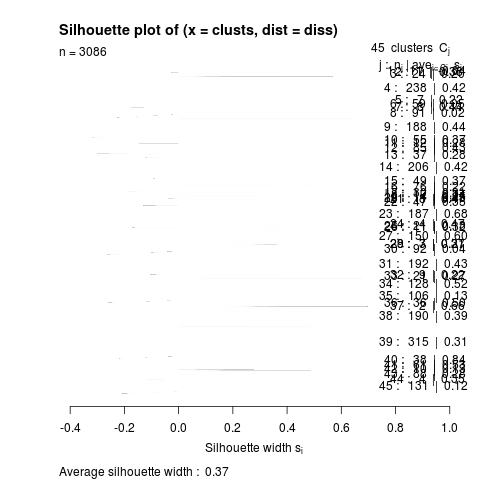

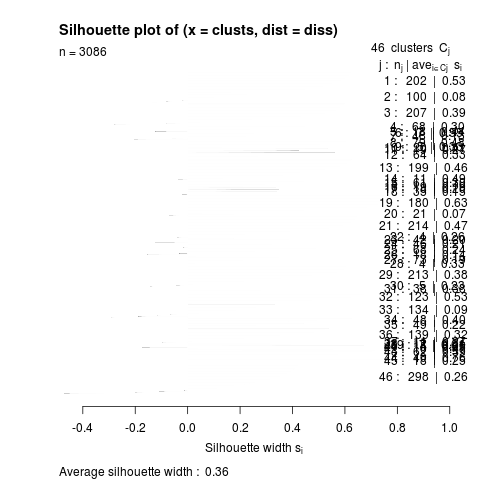

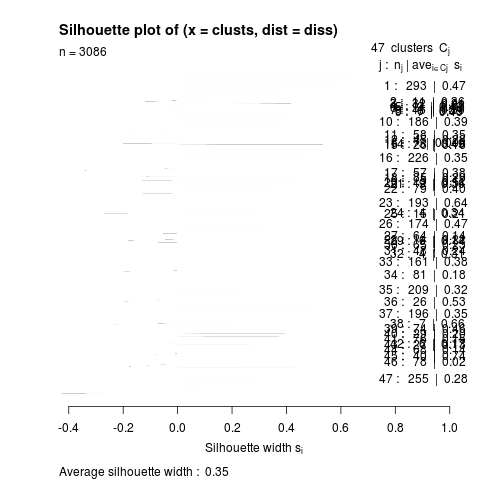

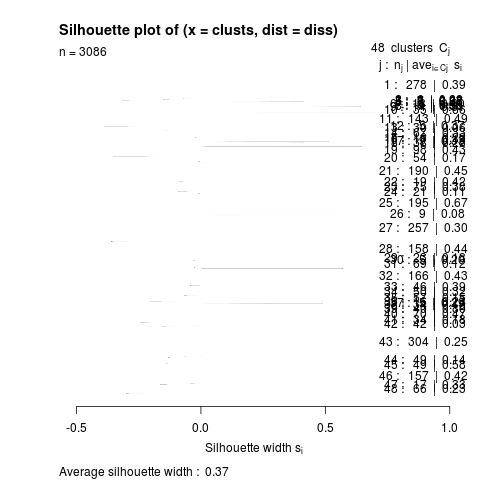

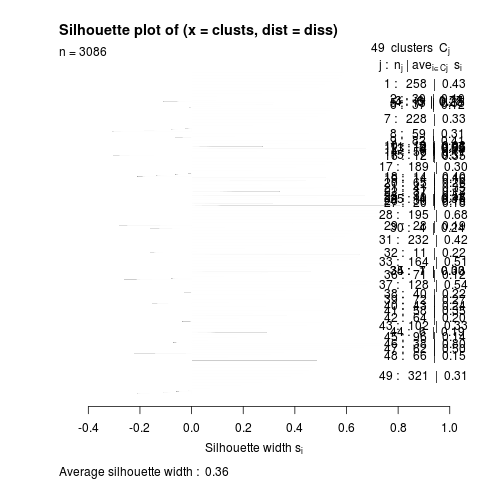

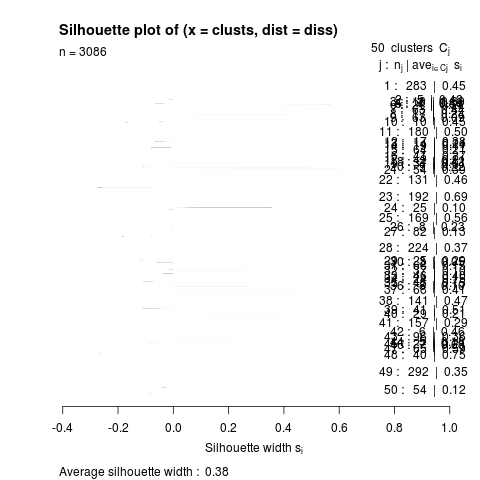

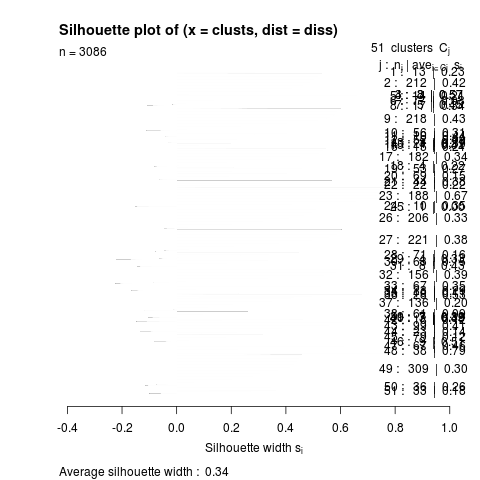

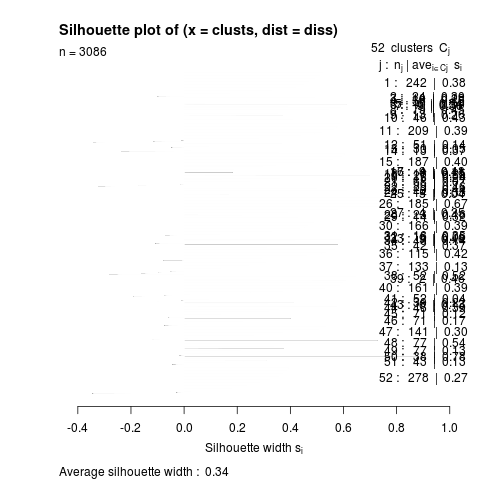

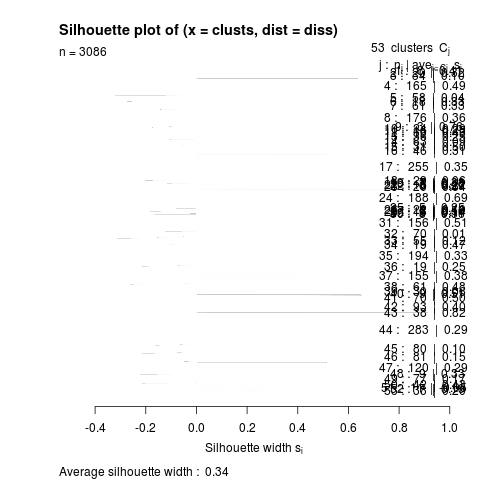

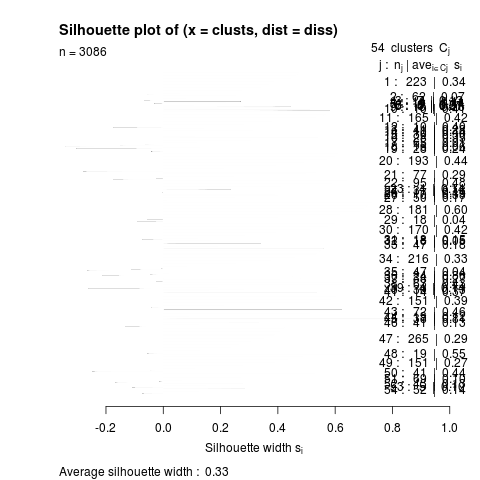

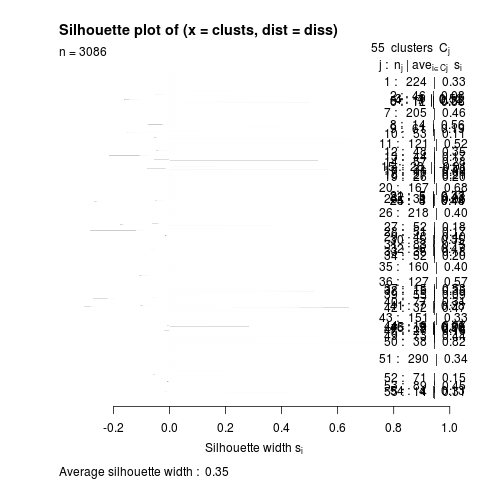

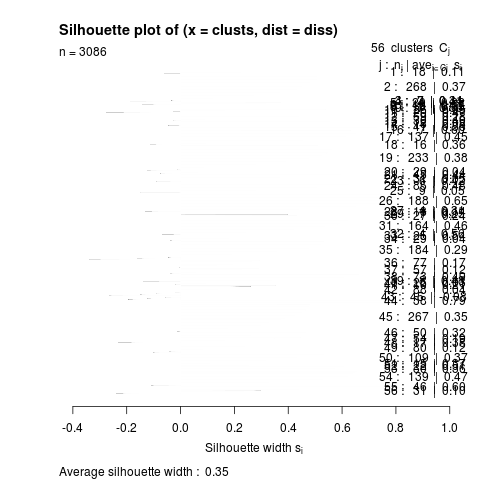

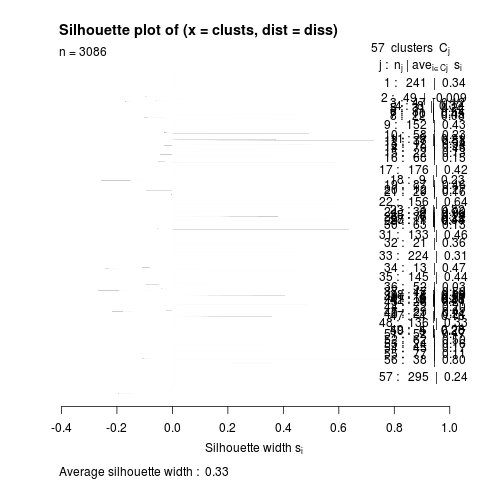

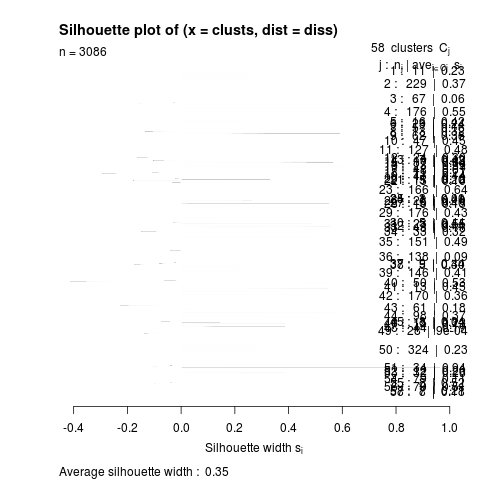

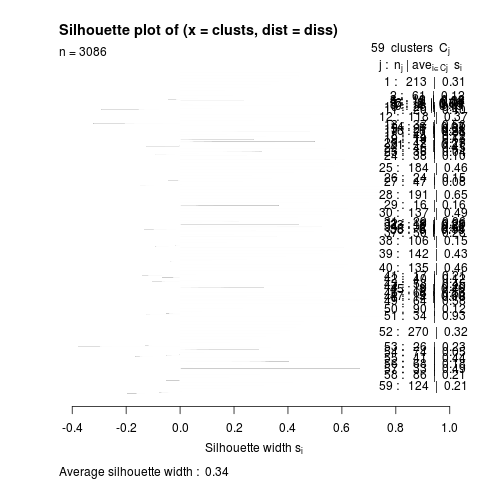

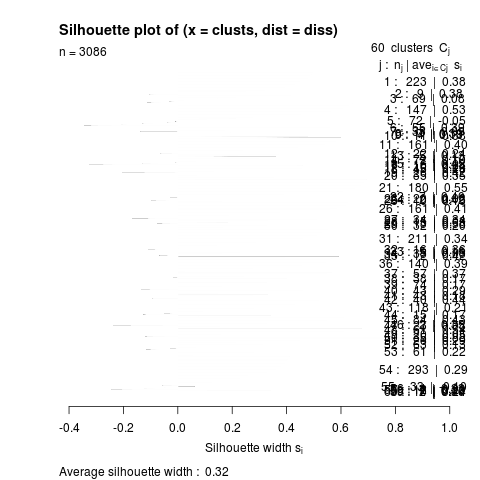

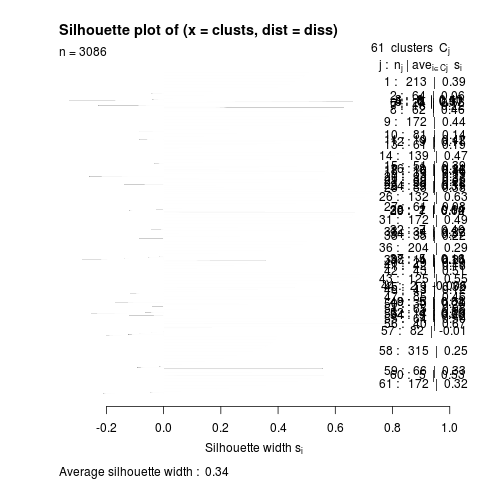

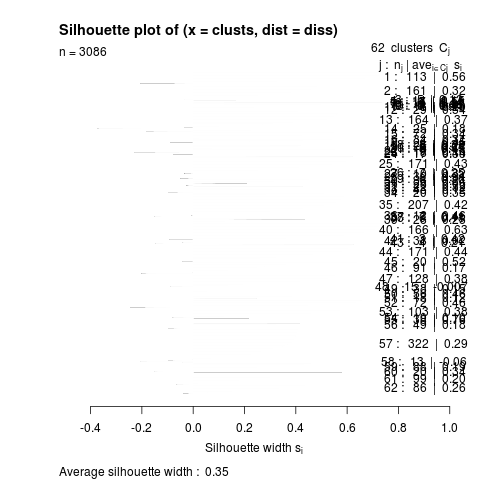

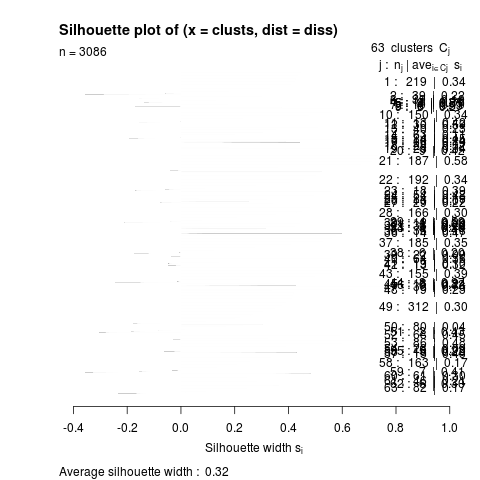

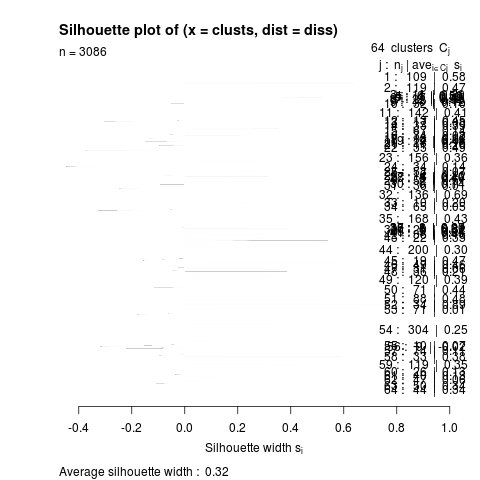

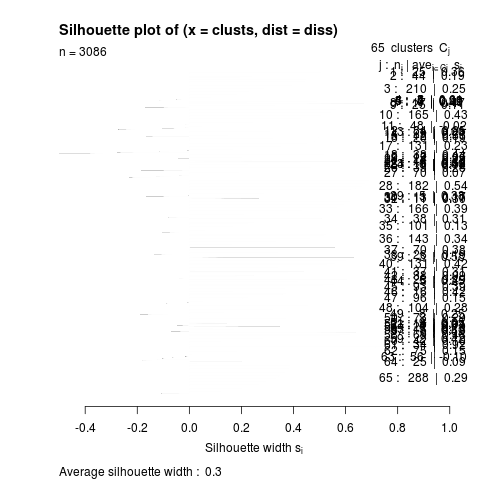

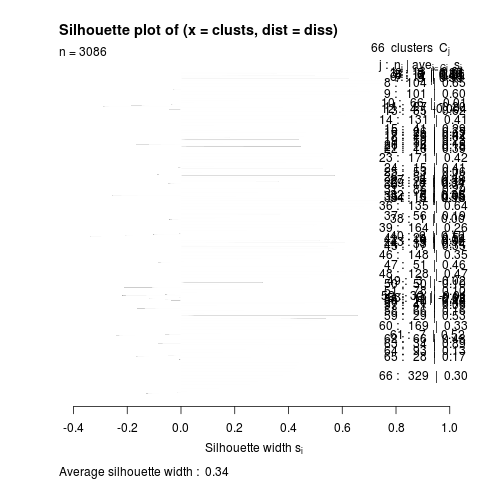

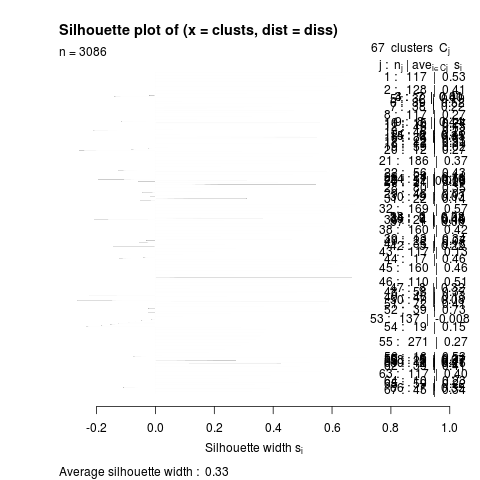

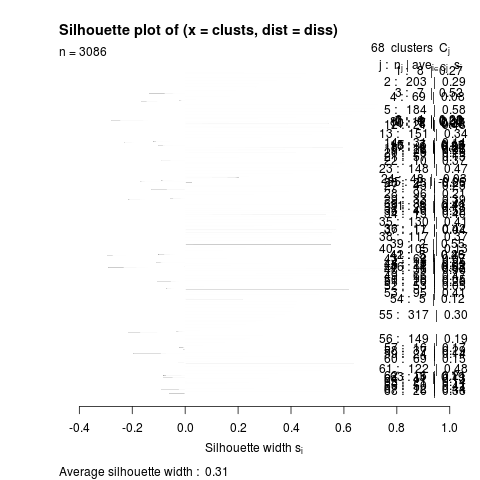

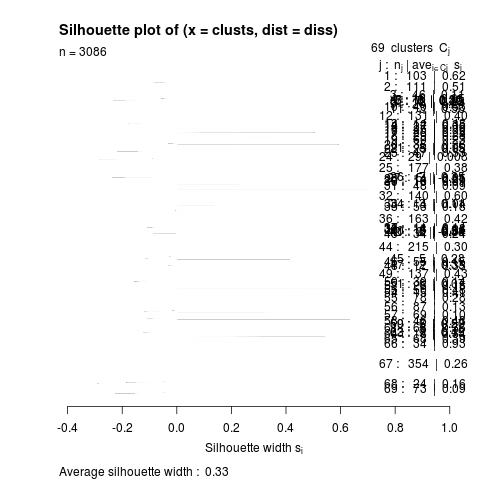

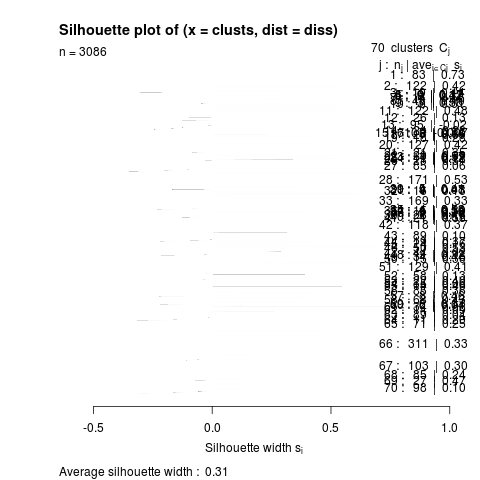

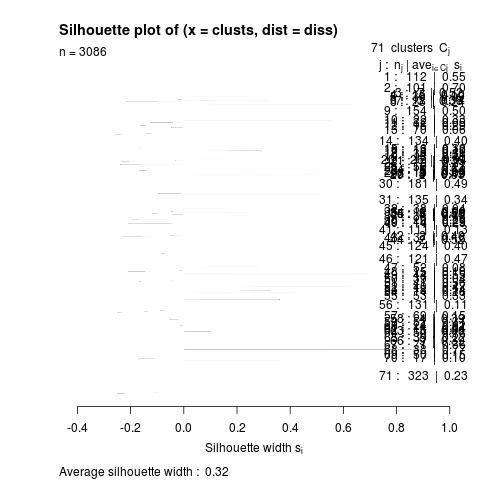

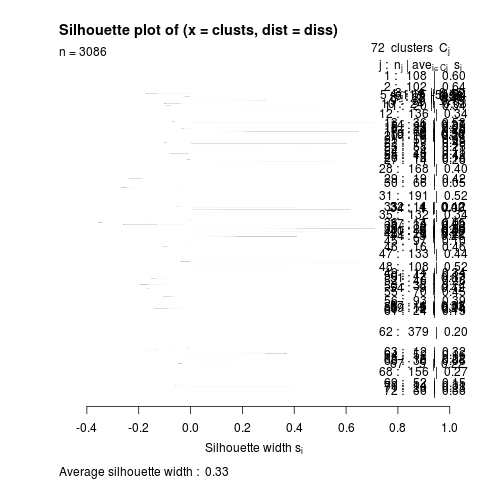

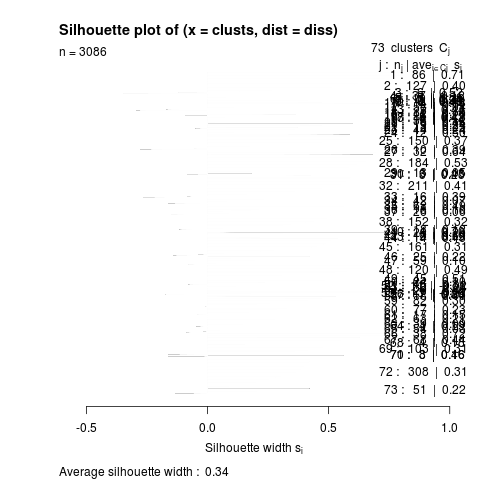

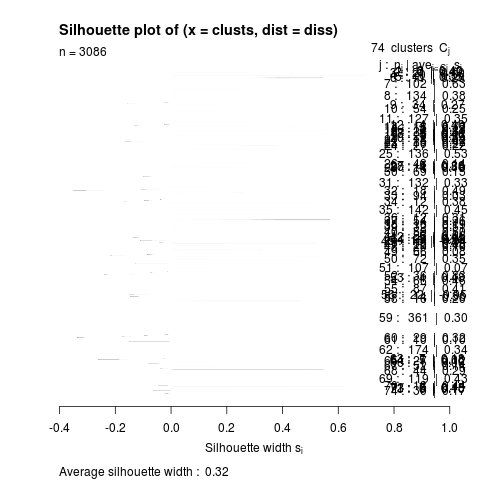

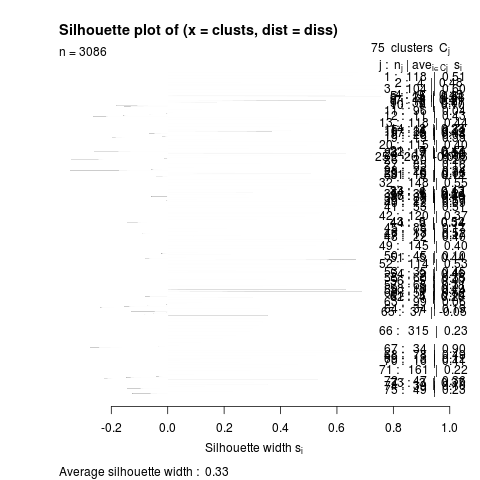

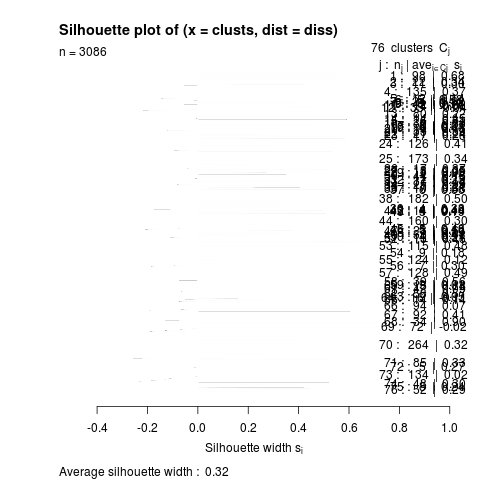

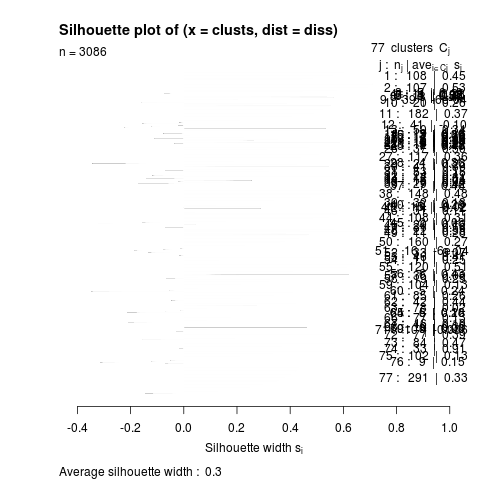

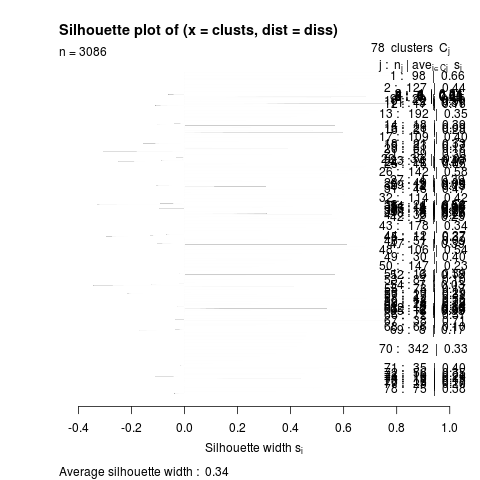

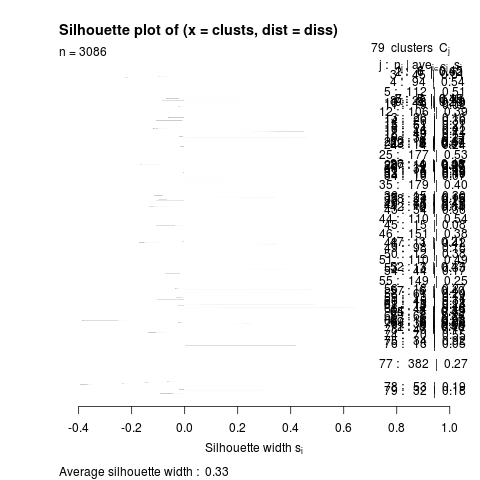

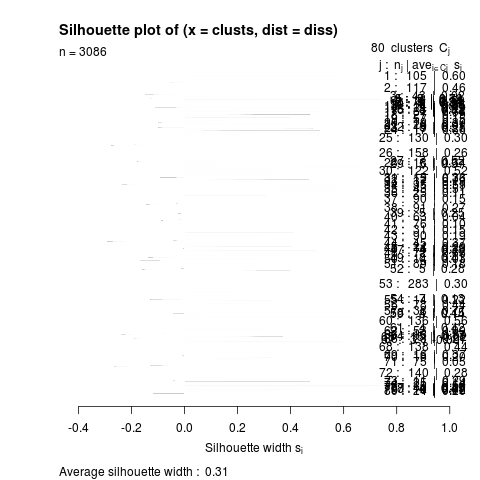

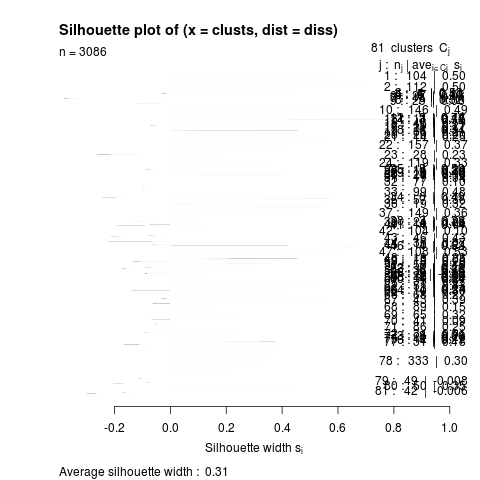

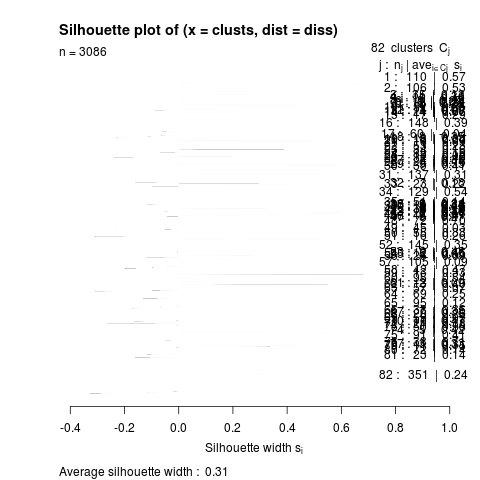

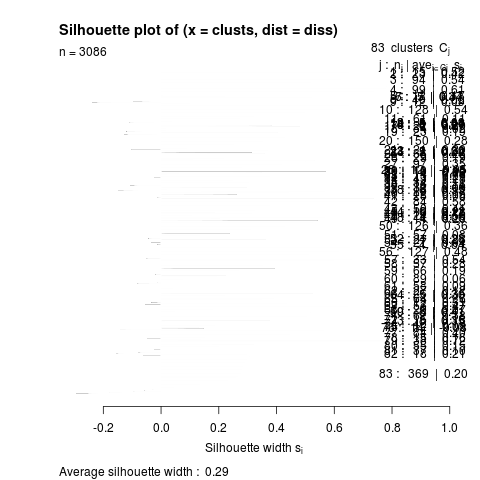

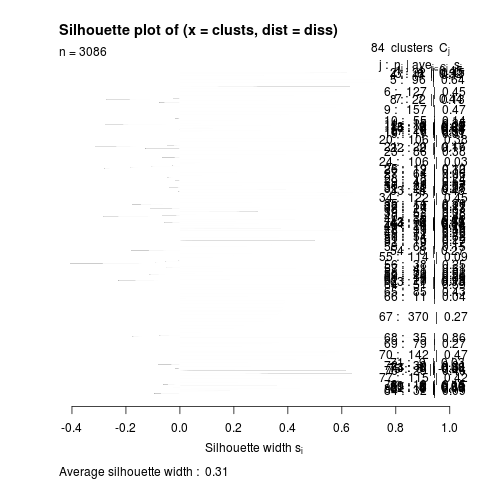

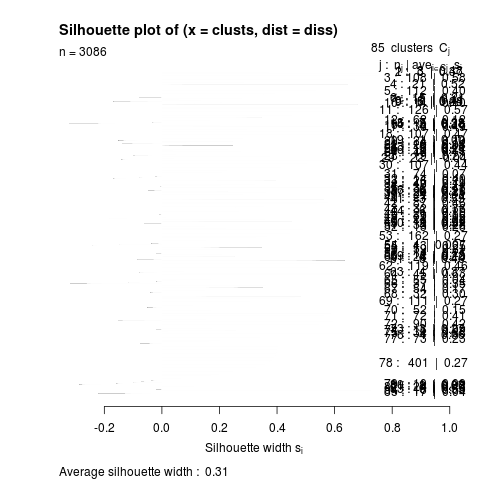

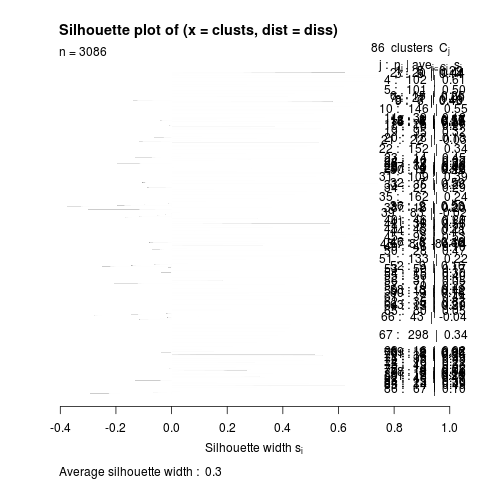

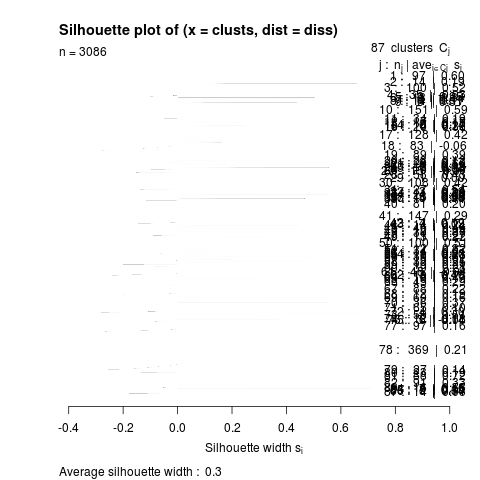

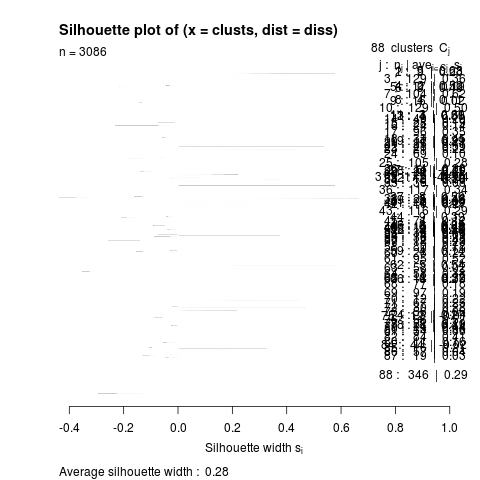

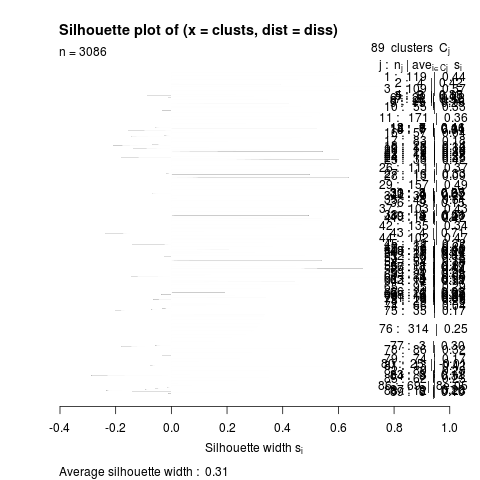

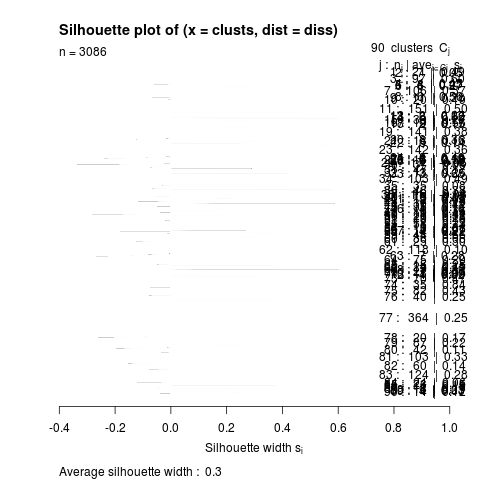

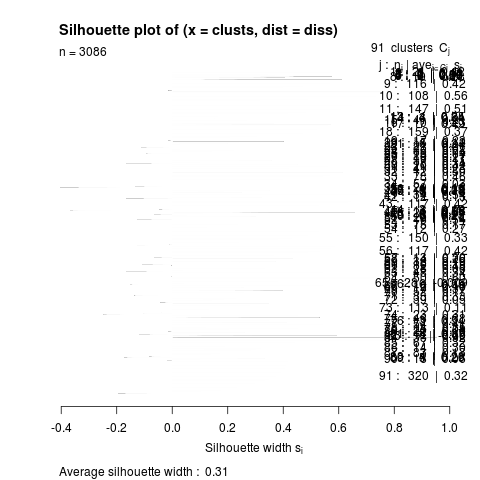

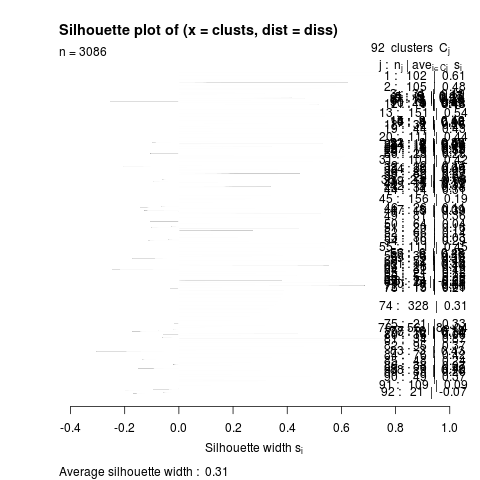

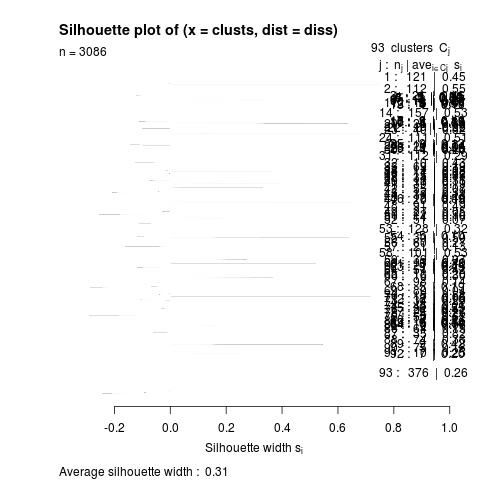

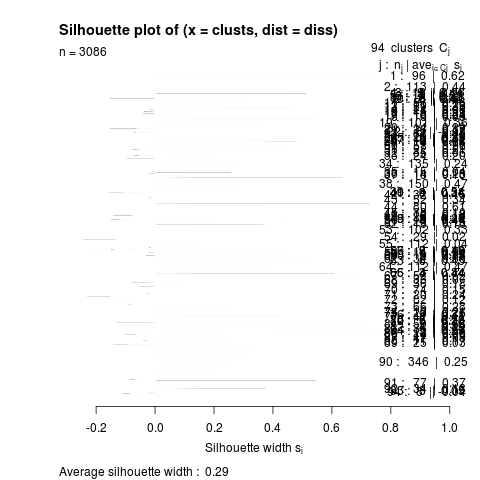

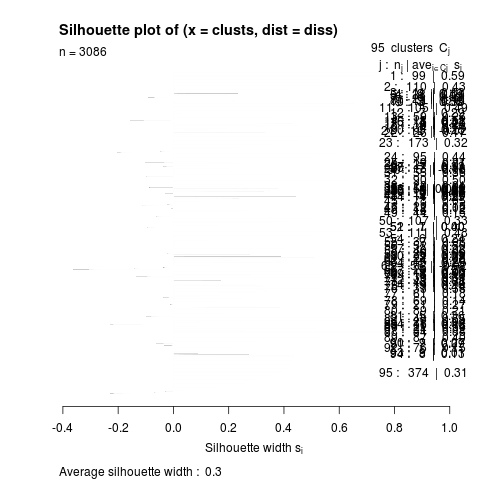

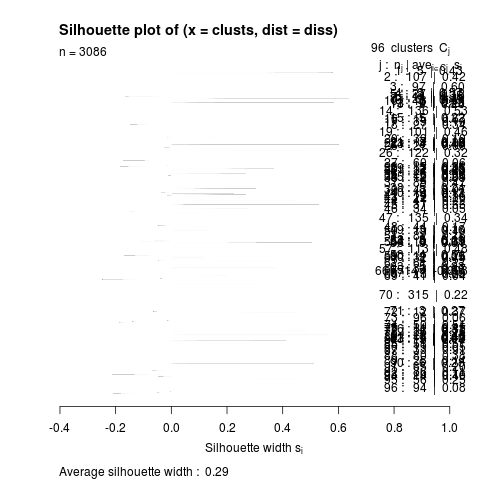

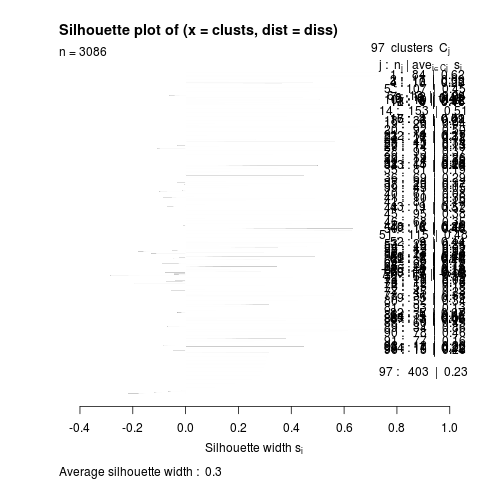

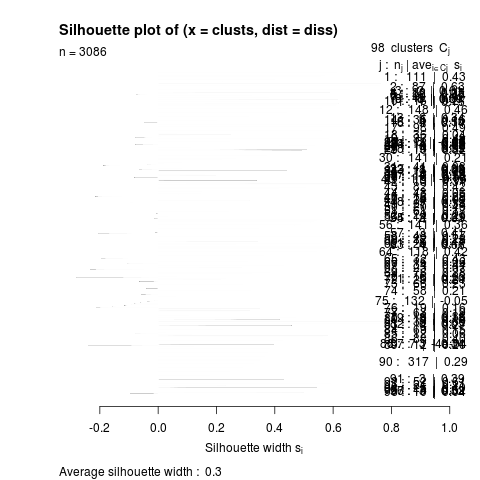

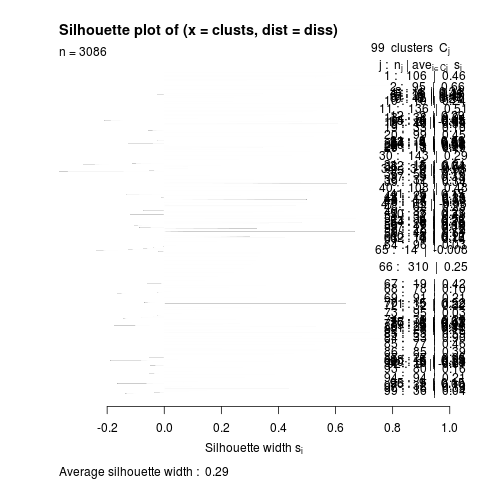

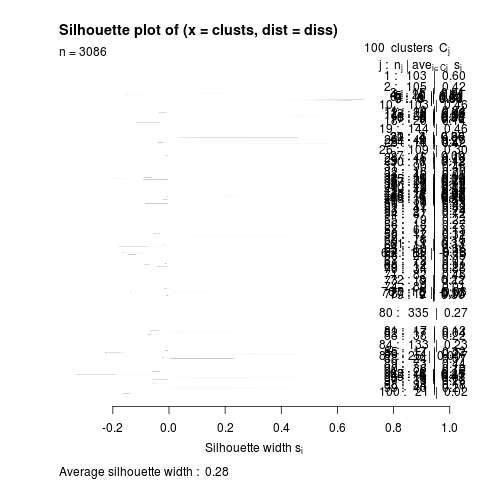

In [5]:
%%R

for (i in 25:100){
    sc3_plot_silhouette(P, k = i)
}